# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

#### Notes to reviewer

From time to time, you will find the %%time command included in some cells.  It is there because I was interested in knowing the execution time of some cells, especially the cells that generated complex graphics. The command is not critical to the final outcome, but interesting to know.  

For the Decision Tree section, I elected not to include the export.text option as I though it would add too much length to the notebook with limited value.  I found the commmand tree.plot_tree to be more valuable. 

I am not the world's greatest speller so there will be spelling mistakes.  Jupyter really needs a spell checker. 

### Background Information

I did some checking on the internet and found the following URLs and hotel cancellation information from 2018: 

https://blog.experience-hotel.com/where-do-cancellations-come-from/

https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy 

https://hospitalitytech.com/global-cancellation-rate-hotel-reservations-reaches-40-average   


Key facts concerning hotel bookings: 
1. Online Distribution has grown by 46.7% between 2014 and 2018
2. 71% of online distribution for independent hotels is generated by online travel agencies in 2018
3. Booking Holdings (company holding booking.com) holds 68% of the OTA market share in 2018
4. Wholesalers and bed banks have grown by over 100% in 5 years 
5. Website Direct remains the second most important sales channel, with 20.9% of market share
6. While still the second best channel, Website Direct has lost 6.3% share in 5 years, which has been taken over by OTAs
7. Almost 40% of on-the-books revenue is canceled before arrival in 2018
8. Average Length-of-Stay has diminished by 12% 
9. After 4 years of negative trend, in 2018 the industry experienced an improvement in both length-of-stay and reservation value
10. Reservations with lead times longer than 60 days are 65% more likely to be canceled

The web sites also stated it was common for guests to make reservations at multiple hotels and then whittle down the choices closer to the arrival date.  Since there is no change for cancellations, it is easy for guests to do this. 

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Function Definitions

I am old fashioned and was originally trained in procedural code.  I like defining functions at the top of the notebook.  
I also find it is better to have everything defined upfront so you can define and load everything all at once.  The flow of the code is also not interrupted with a function defintion.  

In [2]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [3]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [4]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [5]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels


def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [6]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [7]:
# Fuction to define a stacked barplot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [8]:
# Fuction to define a stacked barplot
# Changed the sort order


def stacked_barplot_mine(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[predictor].unique()
    sorter = sorter.tolist()
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=True, axis=1
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=True, axis=1
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [9]:
# function to get a value count and percentage for a column in a dataset


def count_percentage(data, contents):

    """
    To get a value count on a column and its percentage 

    data: dataframe
    contents: column to be counted
   
    """

    tempdf = pd.DataFrame(columns=[contents, "Percentage"])
    tempdf[contents] = data[contents].value_counts()
    tempdf["Percentage"] = data[contents].value_counts(normalize=True)

    print(contents, "with percentage of total \n")
    print(tempdf)

    del tempdf  # free memory

<IPython.core.display.Javascript object>

In [10]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [11]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [12]:
# Define a list used a couple of times in the notebook

month_year = [
    "2017_7",
    "2017_8",
    "2017_9",
    "2017_10",
    "2017_11",
    "2017_12",
    "2018_1",
    "2018_2",
    "2018_3",
    "2018_4",
    "2018_5",
    "2018_6",
    "2018_7",
    "2018_8",
    "2018_9",
    "2018_10",
    "2018_11",
    "2018_12",
]


<IPython.core.display.Javascript object>

In [13]:
# DataFrame to hold results of model performance

models_train_comp_df = pd.DataFrame()
models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

## Import Data

In [14]:
# read the data
df = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/INNHotelsGroup.csv"
)
# Ran code on local machine using Anaconda

# returns the first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [15]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

In [16]:
# Changing the columns 'brand_name' and 'os' into the category data type because that is what they are
# Suggestion from Tasleem

df["type_of_meal_plan"] = df.type_of_meal_plan.astype("category")
df["room_type_reserved"] = df.room_type_reserved.astype("category")
df["market_segment_type"] = df.market_segment_type.astype("category")

<IPython.core.display.Javascript object>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

In [17]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [22]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations: 

No null or duplicated values 

In [18]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

#### Observations:  

* The mean and median for number of adults are very close.  This says 2 adults usually stay together 
* The usual number of children is zero with an outlier of 10 which is probably a large family event 
* The mean and median for the week and weekend night are close to each other at 2 
* The required parking space can be either zero or one so the statistics do not give much detail 
* The mean and median for the lead time are very different which means the data is skewed 
* The arrival year, month, and date are within set ranges 
* Repeated guest is either a zero or one 
* The number of previous cancellations and not cancelled will be skewed data
* The mean and median for average price per room is close to each other 
* Not many special request, but there is an outlier at five 

In [17]:
print("There are", df["type_of_meal_plan"].nunique(), "types of meal plans")
print("There are", df["room_type_reserved"].nunique(), "room types")
print("There are", df["market_segment_type"].nunique(), "market segment types")
print("There are", df["booking_status"].nunique(), "booking status types")

There are 4 types of meal plans
There are 7 room types
There are 5 market segment types
There are 2 booking status types


<IPython.core.display.Javascript object>

#### Notes

Dropping Booking_ID column as it does not provide any value

In [19]:
df.drop(["Booking_ID"], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

#### Number of Adults

In [15]:
count_percentage(df, "no_of_adults")

no_of_adults with percentage of total 

   no_of_adults  Percentage
2         26108    0.719724
1          7695    0.212130
3          2317    0.063873
0           139    0.003832
4            16    0.000441


<IPython.core.display.Javascript object>

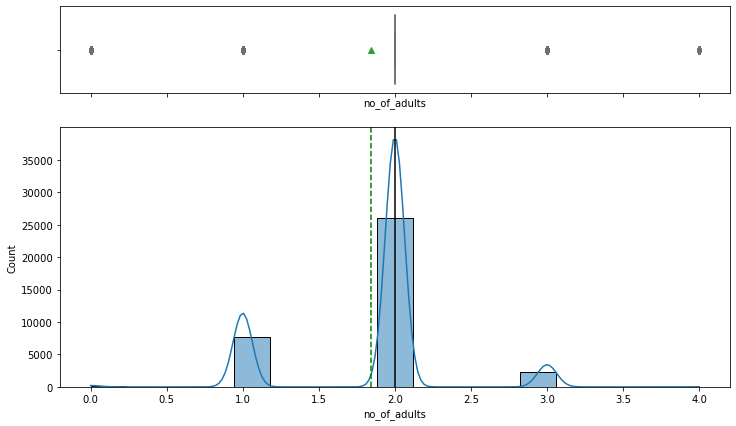

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "no_of_adults")

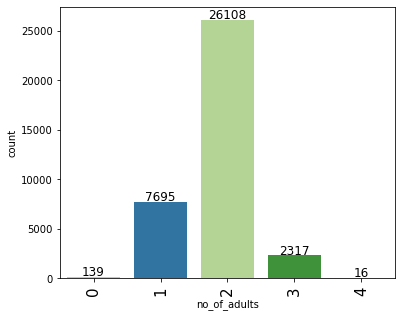

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(df, "no_of_adults")

#### Observations: 

* Most reservations are for two adults 
* This could be a market to analyze further

#### Number of Children

In [16]:
count_percentage(df, "no_of_children")

no_of_children with percentage of total 

    no_of_children  Percentage
0            33577    0.925624
1             1618    0.044604
2             1058    0.029166
3               19    0.000524
9                2    0.000055
10               1    0.000028


<IPython.core.display.Javascript object>

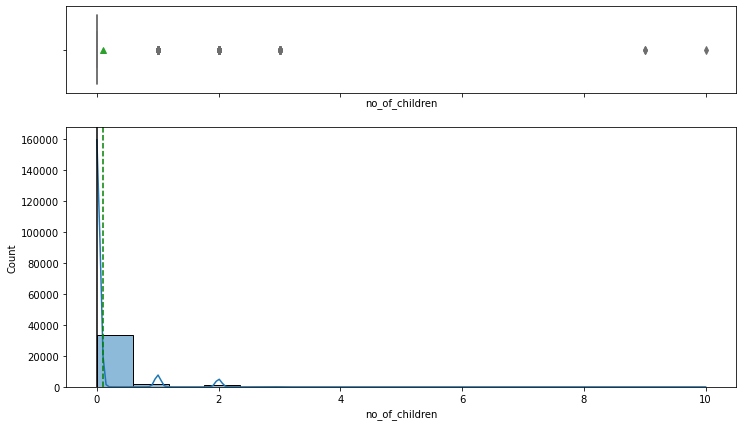

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "no_of_children")

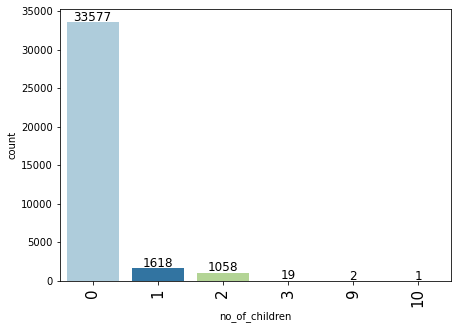

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(df, "no_of_children")

#### Observations: 

* Usual room reservation: 2 adults no children
* The 9 and 10 children are probably for a large family event that got cancelled and then rebooked 

In [21]:
twindf = df[(df["no_of_adults"] == 2)]
total_twin = twindf.shape[0]
total_res = df.shape[0]
print("There are", total_res, "total reservations")
print(
    "There are ",
    total_twin,
    " ",
    round((total_twin / total_res) * 100, 2),
    "% reservations with spouse or other companion",
    sep="",
)


There are 36275 total reservations
There are 26108 71.97% reservations with spouse or other companion


<IPython.core.display.Javascript object>

There are 36275 total reservations
There are 28441 78.4% reservations with children and/or spouse
There are 26108 71.97% reservations with spouse or other companion
There are 7834 21.6% reservations for single person

 



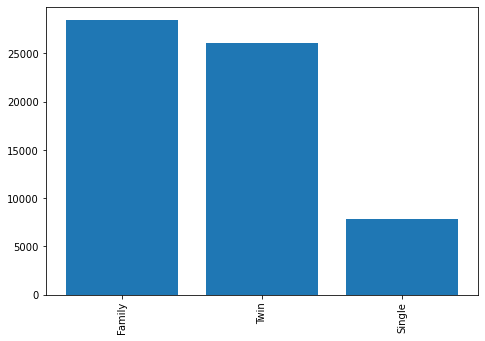

<IPython.core.display.Javascript object>

In [22]:
familydf = df[(df["no_of_adults"] > 1) & (df["no_of_children"] >= 0)]
total_fam = familydf.shape[0]
total_res = df.shape[0]
total_bus = df.shape[0] - familydf.shape[0]
print("There are", total_res, "total reservations")
print(
    "There are ",
    total_fam,
    " ",
    round((total_fam / total_res) * 100, 2),
    "% reservations with children and/or spouse",
    sep="",
)
print(
    "There are ",
    total_twin,
    " ",
    round((total_twin / total_res) * 100, 2),
    "% reservations with spouse or other companion",
    sep="",
)
print(
    "There are ",
    total_bus,
    " ",
    round((total_bus / total_res) * 100, 2),
    "% reservations for single person",
    sep="",
)

print("\n \n")  # for formatting

axis = ["Family", "Twin", "Single"]
guests = [total_fam, total_twin, total_bus]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(axis, guests)
plt.show()

#### Observations: 

* The market is for couples and families which is over 70% of the reservations 
* Single adults -- namely business travelers -- make up a small number of reservations 

#### Number of Weekend Nights

In [17]:
count_percentage(df, "no_of_weekend_nights")

no_of_weekend_nights with percentage of total 

   no_of_weekend_nights  Percentage
0                 16872    0.465114
1                  9995    0.275534
2                  9071    0.250062
3                   153    0.004218
4                   129    0.003556
5                    34    0.000937
6                    20    0.000551
7                     1    0.000028


<IPython.core.display.Javascript object>

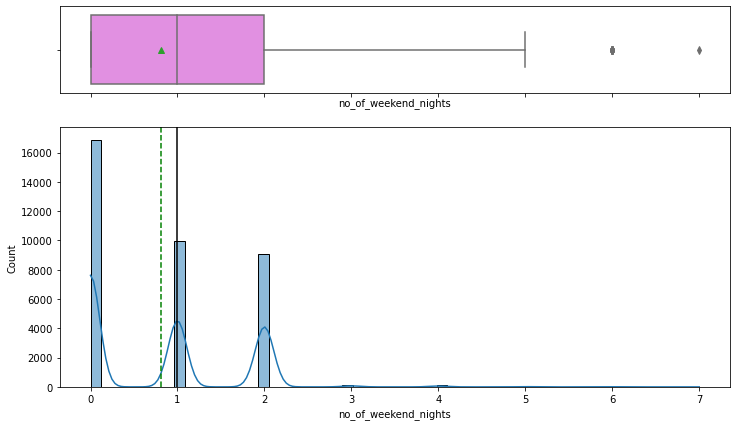

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "no_of_weekend_nights")

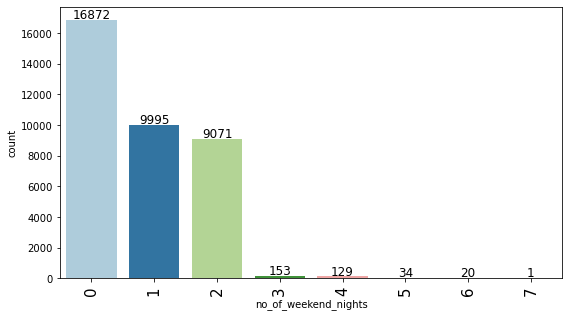

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "no_of_weekend_nights")

#### Observations: 

* Assuming zero weekend nights means the stay was over the week 
* Most reservations are for either one or two weekend nights 

#### Number of Week Nights

In [18]:
count_percentage(df, "no_of_week_nights")

no_of_week_nights with percentage of total 

    no_of_week_nights  Percentage
2               11444    0.315479
1                9488    0.261558
3                7839    0.216099
4                2990    0.082426
0                2387    0.065803
5                1614    0.044493
6                 189    0.005210
7                 113    0.003115
10                 62    0.001709
8                  62    0.001709
9                  34    0.000937
11                 17    0.000469
15                 10    0.000276
12                  9    0.000248
14                  7    0.000193
13                  5    0.000138
17                  3    0.000083
16                  2    0.000055


<IPython.core.display.Javascript object>

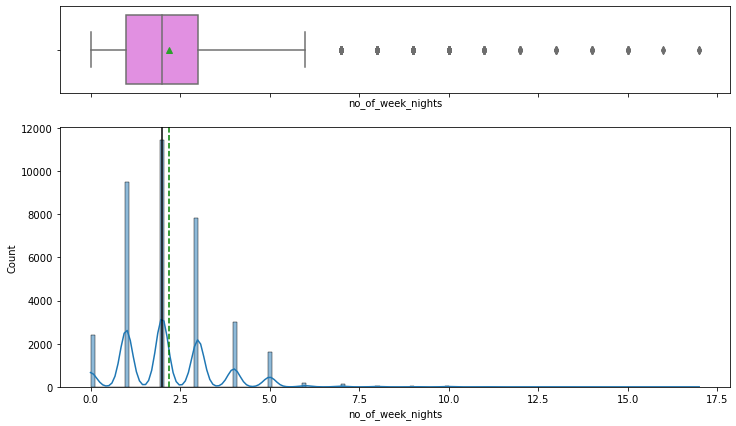

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "no_of_week_nights")

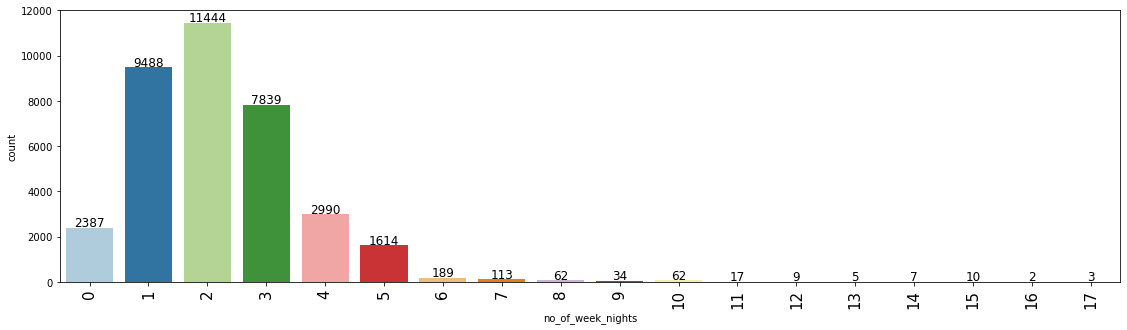

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(df, "no_of_week_nights")

#### Observations: 

* 1, 2, or 3 week nights with a number of outliers past 5 nights 
* During the week, most guests do short stays probably arriving and departing the same week 
* This could be business trips with the spouse along for fun 
* The outlisers could be people doing long term projects 

#### Meal Plan

In [19]:
count_percentage(df, "type_of_meal_plan")

type_of_meal_plan with percentage of total 

              type_of_meal_plan  Percentage
Meal Plan 1               27835    0.767333
Not Selected               5130    0.141420
Meal Plan 2                3305    0.091110
Meal Plan 3                   5    0.000138


<IPython.core.display.Javascript object>

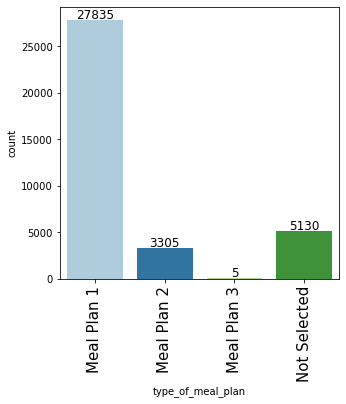

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "type_of_meal_plan")

#### Observations: 

* Most popular mean plan is breakfast only -- not a surprize as most people eat lunch and dinner somewhere else 

#### Required Car Parking Space 

In [20]:
count_percentage(df, "required_car_parking_space")

required_car_parking_space with percentage of total 

   required_car_parking_space  Percentage
0                       35151    0.969014
1                        1124    0.030986


<IPython.core.display.Javascript object>

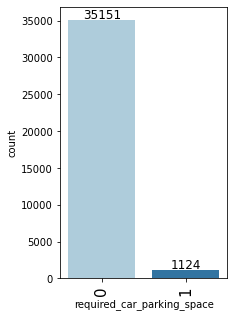

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "required_car_parking_space")

#### Observations: 

* Almost all reservations do not require a parking space 
* This most likely means the hotel is in an urban environment where there are plenty of taxis, Uber, and/or public transportation 

#### Room Type Reserved

In [21]:
count_percentage(df, "room_type_reserved")

room_type_reserved with percentage of total 

             room_type_reserved  Percentage
Room_Type 1               28130    0.775465
Room_Type 4                6057    0.166975
Room_Type 6                 966    0.026630
Room_Type 2                 692    0.019076
Room_Type 5                 265    0.007305
Room_Type 7                 158    0.004356
Room_Type 3                   7    0.000193


<IPython.core.display.Javascript object>

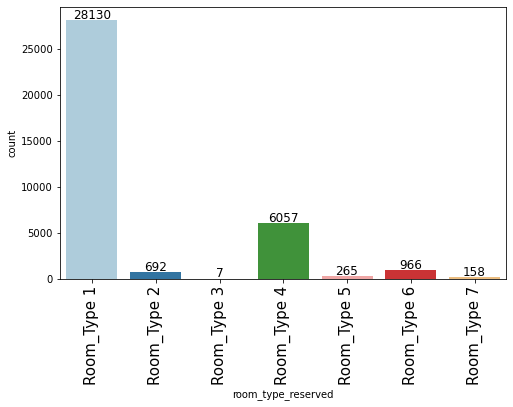

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df, "room_type_reserved")

#### Observations: 

* Room type 1 and 4 are the most popular with room type 1 selling the most 
* Given the guest information with most reservations being for 2 adults, room type 1 is probably a room with 1 large bed and room type 4 is a room with 2 beds
* Not much else can be said since the data is encoded 

#### Lead Time for Reservation 

In [27]:
# Not calling the fuction as I want to see additional information for this variable

tempdf = pd.DataFrame(columns=["lead_time", "Percentage"])
tempdf["lead_time"] = df["lead_time"].value_counts()
tempdf["Percentage"] = df["lead_time"].value_counts(normalize=True)

print("lead_time with percentage of total \n")
print(tempdf)

print("\n\nFirst 15 entries for lead time:")
print(tempdf.head(15))

print("\n")
long_lead = len(df.loc[df["lead_time"] > 65])
print(
    "There are ",
    long_lead,
    " reservations or ",
    round((long_lead / df.shape[0]) * 100, 2),
    "% of reservations with a lead time longer than 65 days",
    sep="",
)

short_lead = len(df.loc[df["lead_time"] <= 10])
print(
    "There are ",
    short_lead,
    " reservations or ",
    round((short_lead / df.shape[0]) * 100, 2),
    "% of reservations with a lead time of 10 days or less",
    sep="",
)


del tempdf

lead_time with percentage of total 

     lead_time  Percentage
0         1297    0.035755
1         1078    0.029717
2          643    0.017726
3          630    0.017367
4          628    0.017312
..         ...         ...
300          1    0.000028
353          1    0.000028
328          1    0.000028
352          1    0.000028
351          1    0.000028

[352 rows x 2 columns]


First 15 entries for lead time:
    lead_time  Percentage
0        1297    0.035755
1        1078    0.029717
2         643    0.017726
3         630    0.017367
4         628    0.017312
5         577    0.015906
6         519    0.014307
8         436    0.012019
7         429    0.011826
12        412    0.011358
14        384    0.010586
11        371    0.010227
37        337    0.009290
39        335    0.009235
9         332    0.009152


There are 16717 reservations or 46.08% of reservations with a lead time longer than 65 days
There are 6886 reservations or 18.98% of reservations with a lead time 

<IPython.core.display.Javascript object>

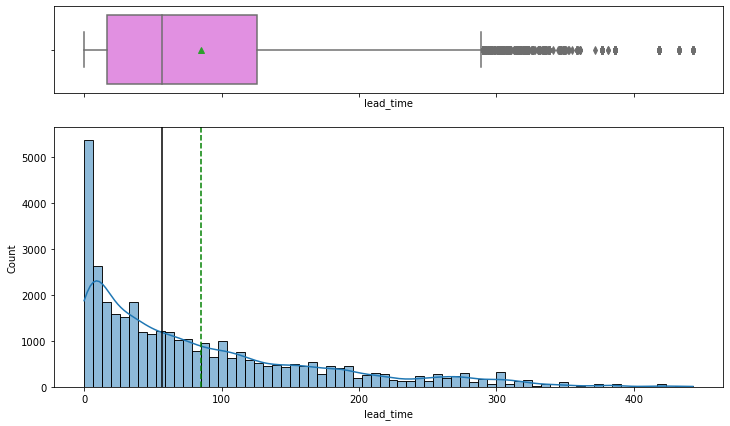

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "lead_time")

#### Observations: 

* "Last minute get aways" or "last minute" business trips since the majority of lead time is between 0 and 4 days
* Could also be sign that hotel is doing "fire sales" on rooms to get "heads in beds" 

#### Arrival Year, Month, and Day

In [23]:
count_percentage(df, "arrival_year")

arrival_year with percentage of total 

      arrival_year  Percentage
2018         29761    0.820427
2017          6514    0.179573


<IPython.core.display.Javascript object>

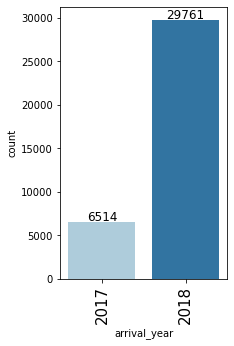

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "arrival_year")

#### Observations: 

* Opened or at least stared data collection in the later half of 2017 
* Tracked the information of all of 2018 

#### Notes:  

For the arrival month, I am assuming the numbers of 1 - 12 correspond to January - December with 1 being January and 12 being December.  

In [24]:
count_percentage(df, "arrival_month")

arrival_month with percentage of total 

    arrival_month  Percentage
10           5317    0.146575
9            4611    0.127112
8            3813    0.105114
6            3203    0.088298
12           3021    0.083280
11           2980    0.082150
7            2920    0.080496
4            2736    0.075424
5            2598    0.071620
3            2358    0.065003
2            1704    0.046975
1            1014    0.027953


<IPython.core.display.Javascript object>

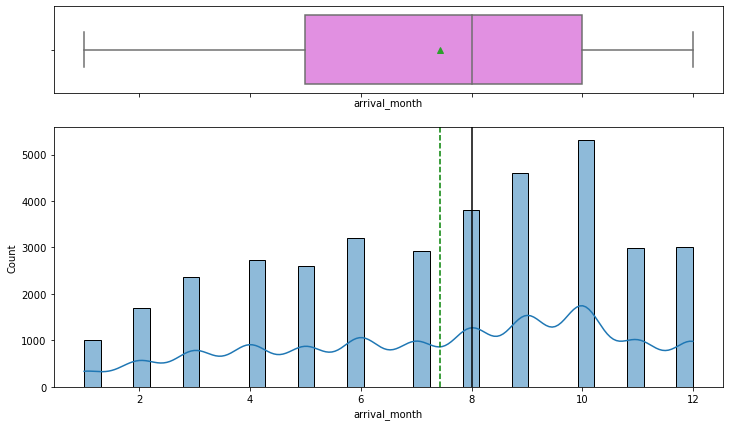

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "arrival_month")

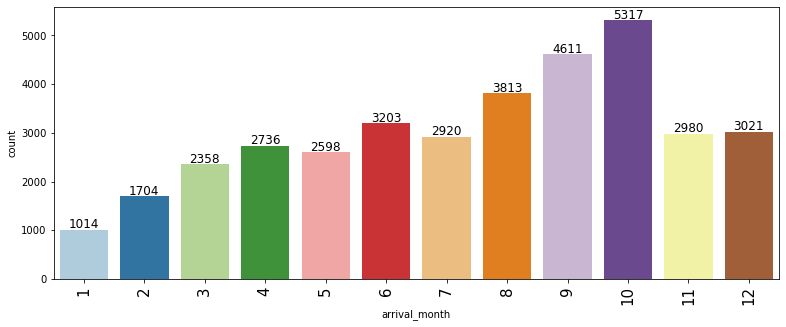

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "arrival_month")

#### Observations: 

* It is easy to say that October is the most popular month, but 2017 is mixed with 2018 data 
* The big three months are August, September, and October
* Need to separate the data by year and month

In [25]:
count_percentage(df, "arrival_date")

arrival_date with percentage of total 

    arrival_date  Percentage
13          1358    0.037436
17          1345    0.037078
2           1331    0.036692
4           1327    0.036582
19          1327    0.036582
16          1306    0.036003
20          1281    0.035314
15          1273    0.035093
6           1273    0.035093
18          1260    0.034735
14          1242    0.034238
30          1216    0.033522
12          1204    0.033191
8           1198    0.033025
29          1190    0.032805
21          1158    0.031923
5           1154    0.031813
26          1146    0.031592
25          1146    0.031592
1           1133    0.031234
9           1130    0.031151
28          1129    0.031123
7           1110    0.030600
24          1103    0.030407
11          1098    0.030269
3           1098    0.030269
10          1089    0.030021
27          1059    0.029194
22          1023    0.028201
23           990    0.027292
31           578    0.015934


<IPython.core.display.Javascript object>

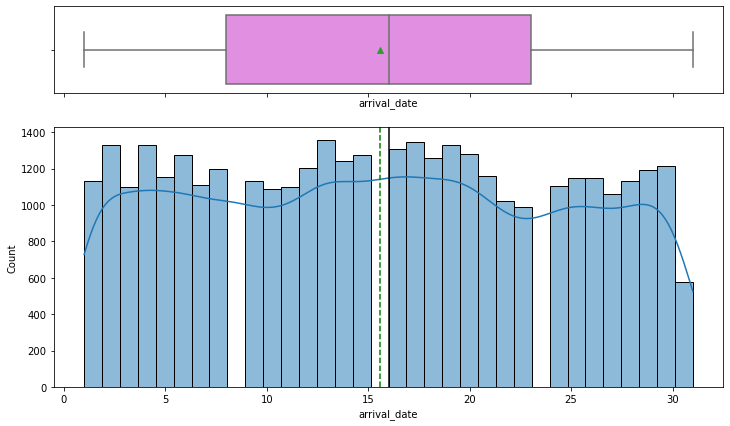

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "arrival_date")

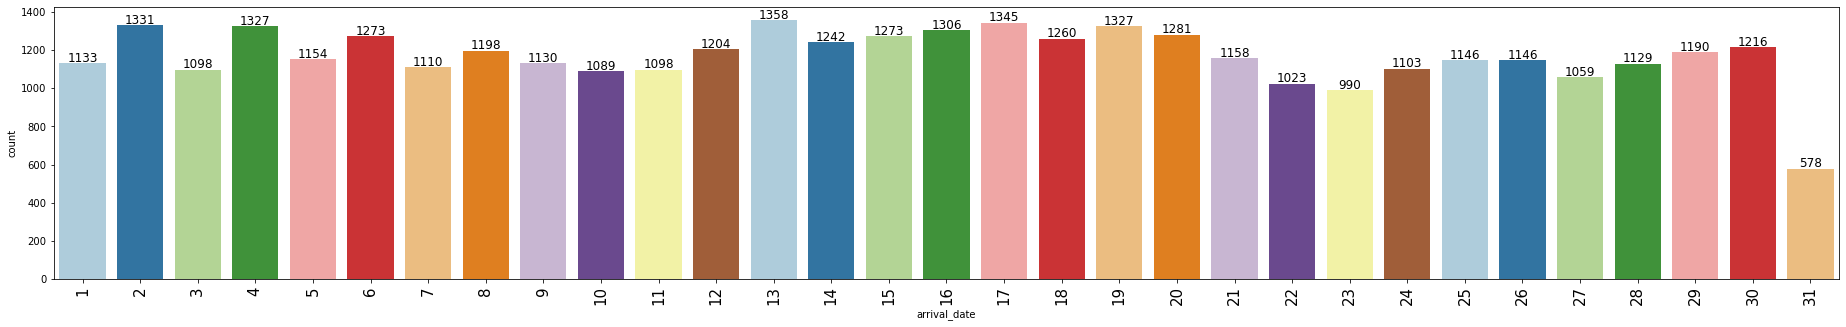

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "arrival_date")

#### Observations: 

* Just about an even spread between the calendar dates for arrivals 
* Day 31 is low since only 7 months have 31 days 

#### Market Segment Type

In [26]:
count_percentage(df, "market_segment_type")

market_segment_type with percentage of total 

               market_segment_type  Percentage
Online                       23214    0.639945
Offline                      10528    0.290227
Corporate                     2017    0.055603
Complementary                  391    0.010779
Aviation                       125    0.003446


<IPython.core.display.Javascript object>

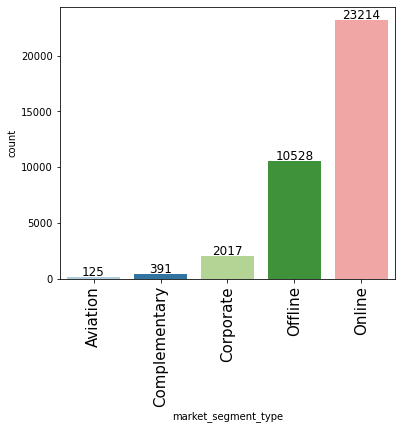

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "market_segment_type")

#### Observations: 

* 63.99% of the guests come from the Online market segment 
* 29.02% from the Offline market segment which means they either call the hotel directly or call a central reservation number
* Together this represents 93.01% of all hotel guests.  
* The corporate and aviation markets can be grown 

#### Repeated Guest

In [27]:
count_percentage(df, "repeated_guest")

repeated_guest with percentage of total 

   repeated_guest  Percentage
0           35345    0.974363
1             930    0.025637


<IPython.core.display.Javascript object>

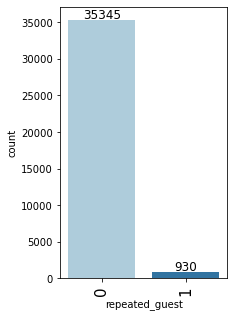

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "repeated_guest")

#### Observations: 

* Very few repeated guests
* This is a red flag 

#### Number of Previous Cancellations

In [28]:
count_percentage(df, "no_of_previous_cancellations")

no_of_previous_cancellations with percentage of total 

    no_of_previous_cancellations  Percentage
0                          35937    0.990682
1                            198    0.005458
2                             46    0.001268
3                             43    0.001185
11                            25    0.000689
5                             11    0.000303
4                             10    0.000276
13                             4    0.000110
6                              1    0.000028


<IPython.core.display.Javascript object>

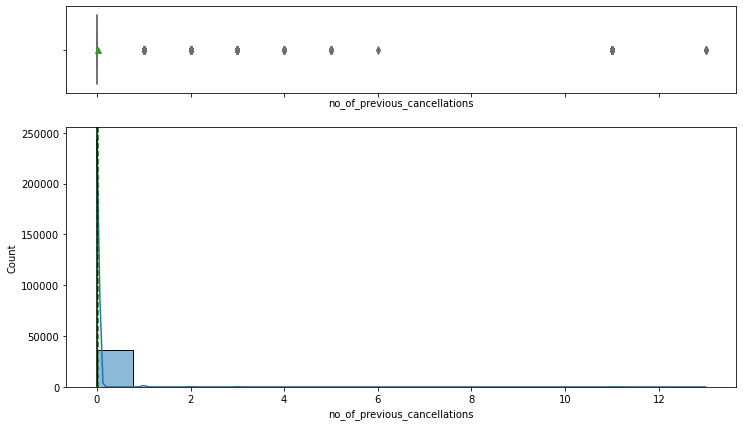

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "no_of_previous_cancellations")

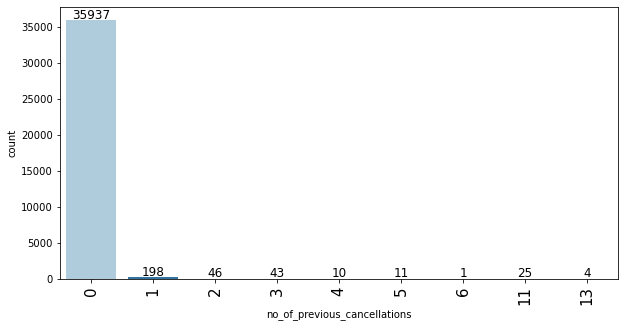

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "no_of_previous_cancellations")

#### Observations: 

* The number of previous cancellations is very low and very right skewed 
* A high number of first time guests that do not return?  
    * This is an issue

#### Number of Previous_bookings not Canceled

In [29]:
count_percentage(df, "no_of_previous_bookings_not_canceled")

no_of_previous_bookings_not_canceled with percentage of total 

    no_of_previous_bookings_not_canceled  Percentage
0                                  35463    0.977615
1                                    228    0.006285
2                                    112    0.003088
3                                     80    0.002205
4                                     65    0.001792
5                                     60    0.001654
6                                     36    0.000992
7                                     24    0.000662
8                                     23    0.000634
10                                    19    0.000524
9                                     19    0.000524
11                                    15    0.000414
12                                    12    0.000331
14                                     9    0.000248
15                                     8    0.000221
16                                     7    0.000193
13                                 

<IPython.core.display.Javascript object>

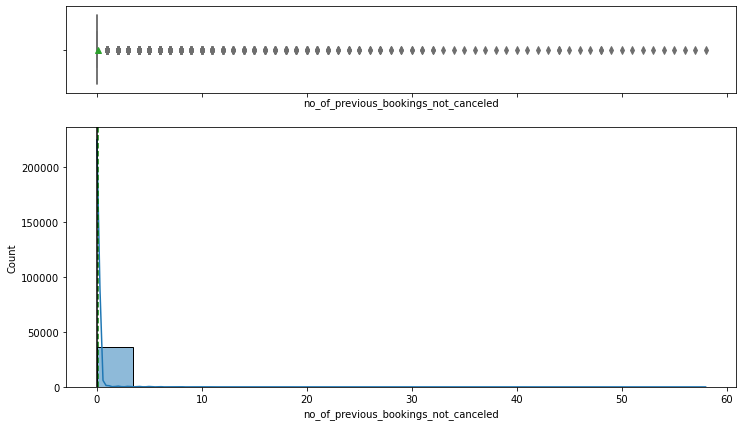

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

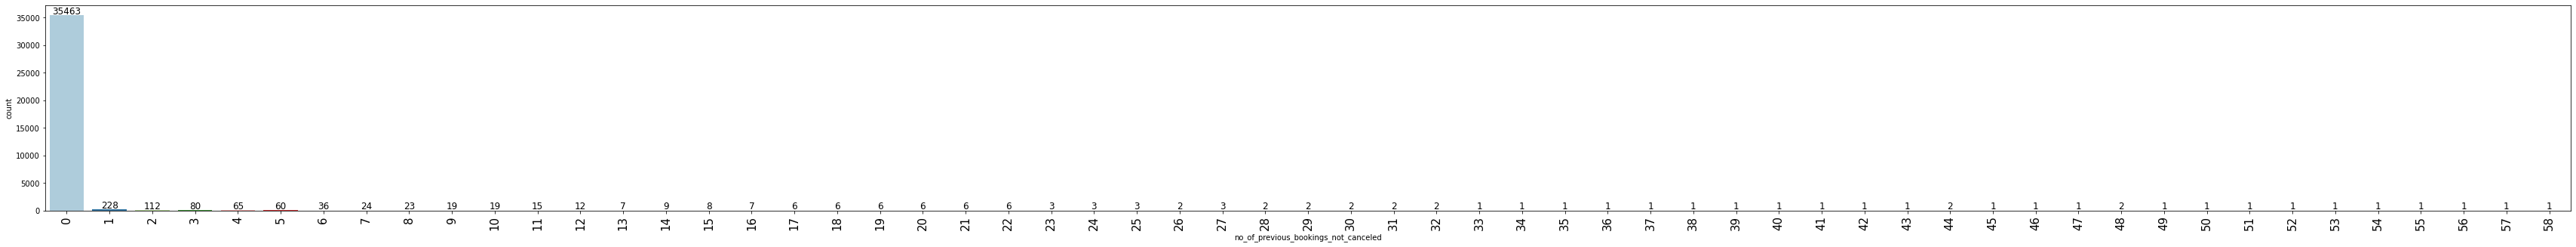

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled")

#### Observations:  

* Low number of previous bookings not canceled with the data being very right skewed 
* Yet a low number of repeat guests 
* Many "one and done" guests?  -- stay once and do not return

#### Average Price per Room

In [30]:
count_percentage(df, "avg_price_per_room")

avg_price_per_room with percentage of total 

        avg_price_per_room  Percentage
65.00                  848    0.023377
75.00                  826    0.022771
90.00                  703    0.019380
95.00                  669    0.018442
115.00                 662    0.018249
...                    ...         ...
212.42                   1    0.000028
83.48                    1    0.000028
70.42                    1    0.000028
130.99                   1    0.000028
167.80                   1    0.000028

[3930 rows x 2 columns]


<IPython.core.display.Javascript object>

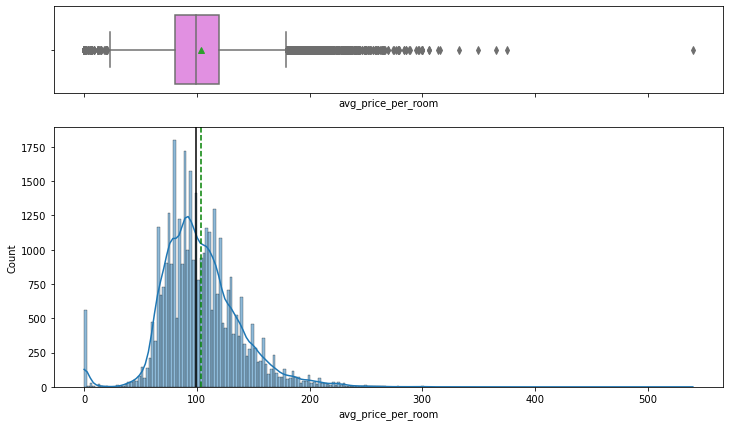

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "avg_price_per_room")

#### Observations: 

* The zero price are complementary rooms 
* The mean and median price are very close to each other at around 100 euros 
* The majority of the price data is close to normally distributed 
* There are many outliers with a set at around 550 euros 
* The outliers could be worth investigating 

#### Number of Special Requests

In [31]:
count_percentage(df, "no_of_special_requests")

no_of_special_requests with percentage of total 

   no_of_special_requests  Percentage
0                   19777    0.545196
1                   11373    0.313522
2                    4364    0.120303
3                     675    0.018608
4                      78    0.002150
5                       8    0.000221


<IPython.core.display.Javascript object>

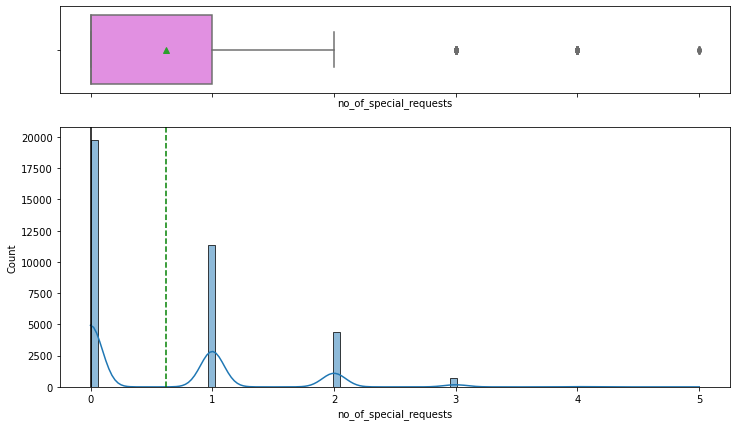

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df, "no_of_special_requests")

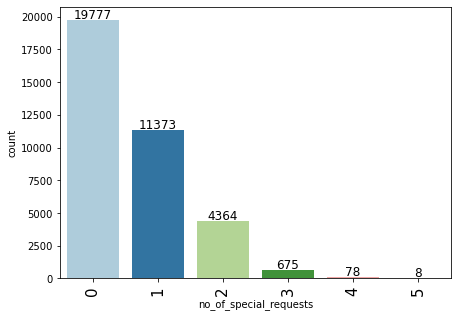

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "no_of_special_requests")

#### Observations: 

* Very few special requests 
* The majority of guests do not have any special requests 
    * This would make sense since there are a few repeat guests 
* The majority of guests have up to 2 special requests 
* Of course, there are a few guests with many requests 

#### Booking Status

In [14]:
count_percentage(df, "booking_status")

booking_status with percentage of total 

              booking_status  Percentage
Not_Canceled           24390    0.672364
Canceled               11885    0.327636


<IPython.core.display.Javascript object>

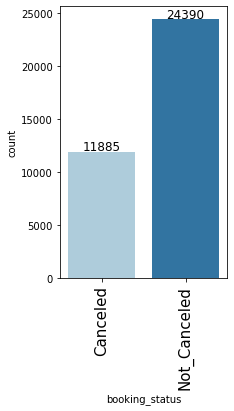

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "booking_status")

#### Observations: 

* 32.76% of bookings are cancelled -- roughly a third of the reservations 

### Bivariate Analysis

#### Correlation

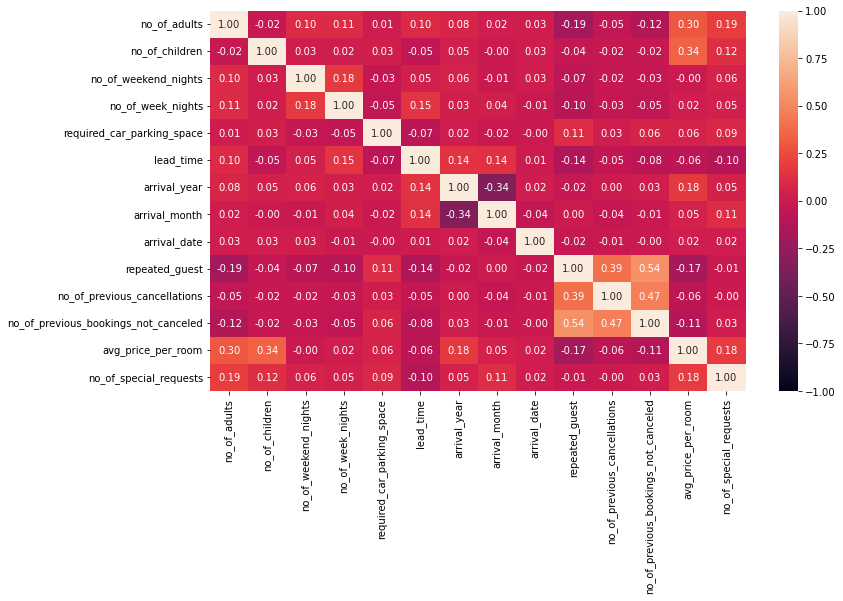

Wall time: 586 ms


<IPython.core.display.Javascript object>

In [41]:
%%time

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations: 

* For the most part, there is low correlation between all the variables
* Exceptions: 
    * Number of Adults - Average Price of Room 
    * Number of Children - Average Price of Room 
    * Repeated guest - Number of previous bookings not canceled
    * Repeated guest - Number of previous cancellations 
    * The exceptions make since as if you are traveling with children, you want the best rate possible 
    * Only repeat guests can have previous bookings and cancellations 

#### Arrival Year and Arrival Month

This is plotting and analyzing the data over the entire 18 months

arrival_year  arrival_month
2017          7                 363
              8                1014
              9                1649
              10               1913
              11                647
              12                928
2018          1                1014
              2                1704
              3                2358
              4                2736
              5                2598
              6                3203
              7                2557
              8                2799
              9                2962
              10               3404
              11               2333
              12               2093
Name: booking_status, dtype: int64

 



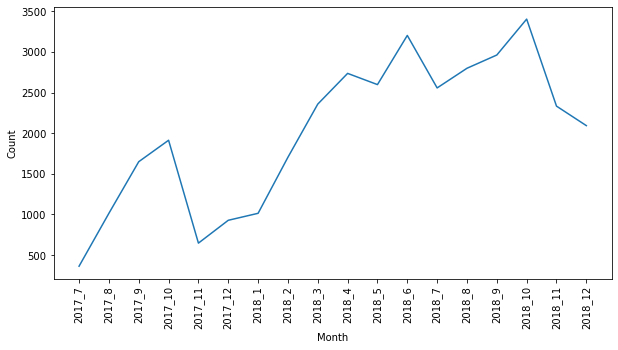

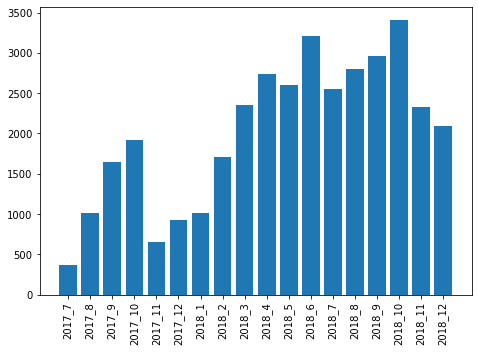

<IPython.core.display.Javascript object>

In [20]:
workdf = df.groupby(["arrival_year", "arrival_month"])["booking_status"].count()
print(workdf)

print("\n \n")  # for formatting

workdf = pd.DataFrame({"Month": month_year, "Count": list(workdf.values)})

# plotting the trend over different months
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(data=workdf, x="Month", y="Count", markers=True)
plt.show()

print("\n \n")  # for formatting

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(workdf["Month"], workdf["Count"])
plt.show()

del workdf  # free memory

#### Observations: 

* The busiest months for the hotel were between April 2018 and end of October 2018.  
* September and October 2017 and 2018 also seeem to be very popular.  
* There is also a good spike in June 2018. 
* The down turns in November, December, and January are common as many people do not travel that much 

#### Market Segment Type and Average Price per Room

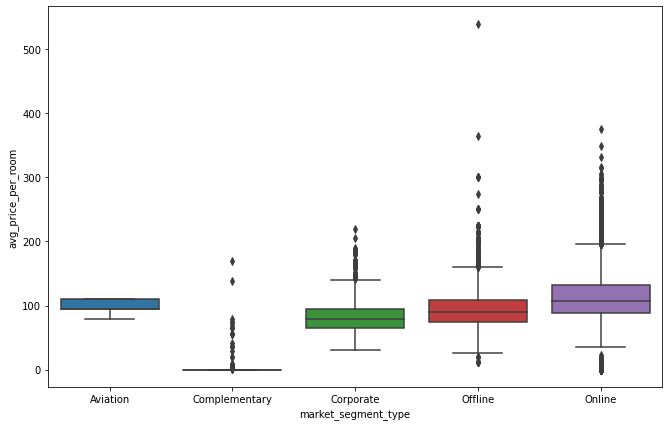

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room")
plt.show()

#### Observations: 

* There is very little price diffences for Aviation as that is probably a fixed price under contract with the airlines
* There is the most variation for Offline and Online price averages, but their medians are close to each other 
* Corporate prices are usually fixed prices by company  
    * This points to many different prices for many companies 
* The usual price is around 100 euro per night 

#### Market Segment Type and Booking Status 

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


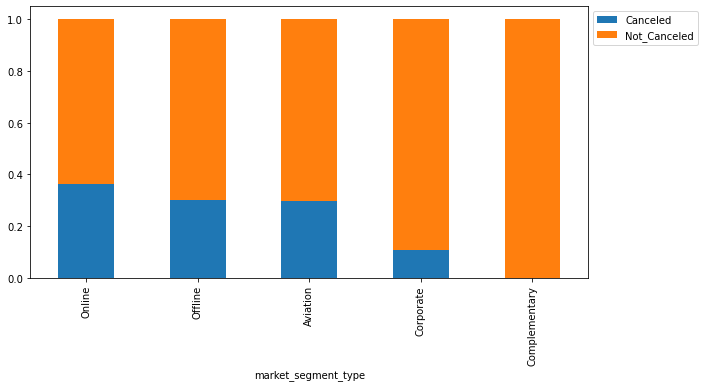

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "market_segment_type", "booking_status")

#### Observations:  
* No cancellations for Complementary reservations 
    * No surprise, the room is free! 
* Corporate has the least cancellations as the guests are probably business travelers 
* Online, Offline, and Aviation have the most cancellations 
    * Area for improvment 

#### Number of Special Requests and Booking Status 

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


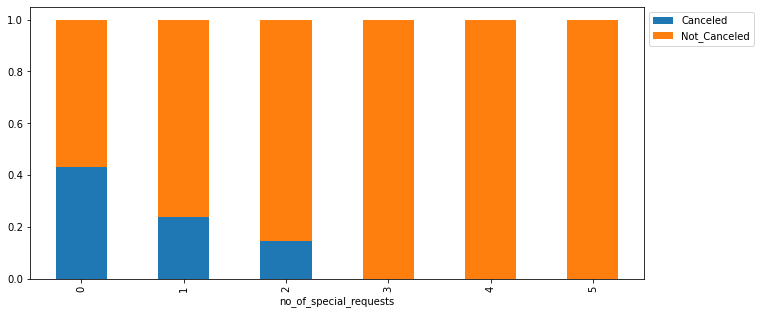

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

#### Observations: 

* The more special requsts, the high probably of a guest not cancelling 
    * This points to return guests who know the hotel and what they like 
* As there are many first time guests, they do not have many special requests 
* 32.76% of guests without any special requests cancel their reservation 
    * This is an any for investigation 

#### Number of Special Requests and Average Price per Room

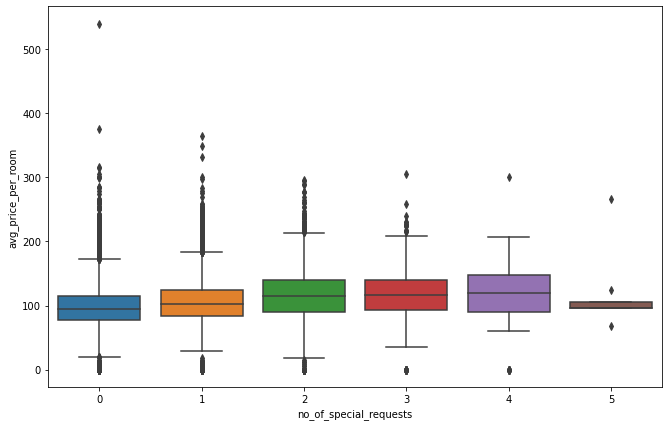

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=df, x="no_of_special_requests", y="avg_price_per_room")
plt.show()

#### Observations: 

* The median of the average price is just about the same across the number of special requests
* The variation and spread of the price goes down as the number of special requests goes up 
* The variation and spread are the greatest for 0 and 1 special requests 
    * The price variation is probaly due to wanting to book the rooms 

#### Average Price per Room and Booking Status 

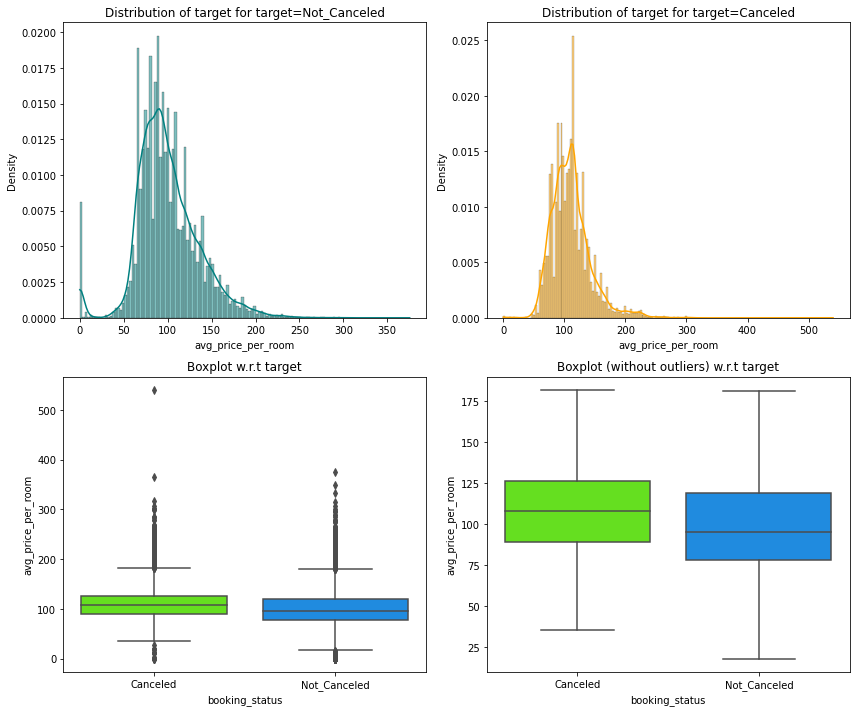

Wall time: 829 ms


<IPython.core.display.Javascript object>

In [24]:
%%time

distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

#### Observations: 

* There is not much difference between price and canceled or not canceled 
* The histogram for price and canceled is much wider than the histogram for not canceled 
* Both histograms have the same skew
* It appears that there is not much correlation between the two variables 

#### Lead Time and Booking Status 

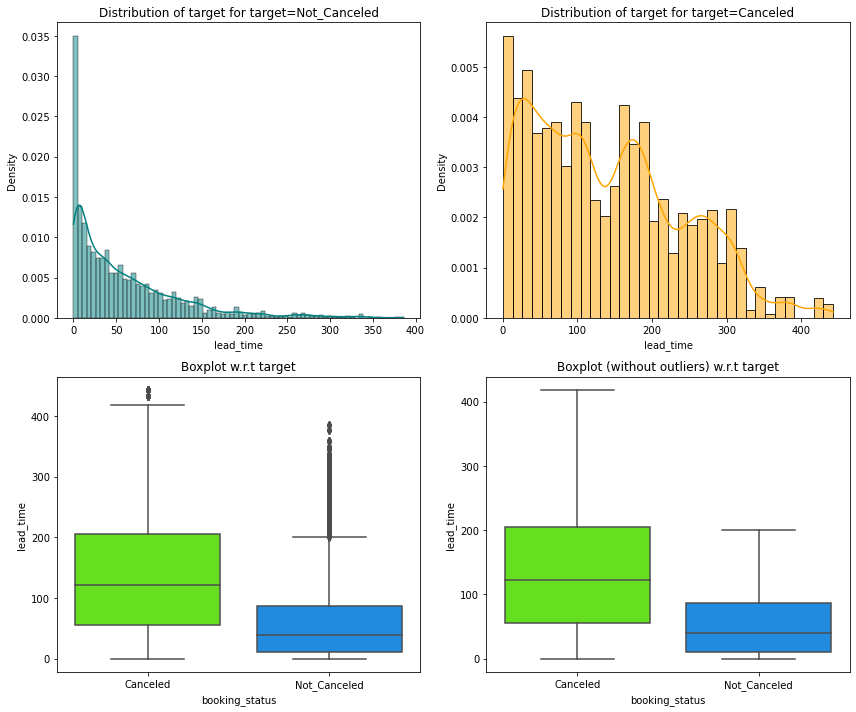

Wall time: 548 ms


<IPython.core.display.Javascript object>

In [26]:
%%time

distribution_plot_wrt_target(df, "lead_time", "booking_status", )

#### Observations: 

* Many of the not canceled books where booked very close to if not the day of arrival 
    * Last minute trips or fire sale of room to get "Heads in Beds" 
    * Since most guests are two adults, the trips could be "quick getaways" 
* Cancellations are much more common for bookings done 0 to 300 days out 
* A booking is much more likely to get canceled the further out it is made 
    * Could be an area for improvement 

#### Number of Adults and Booking Status 

No children
<br>
2 or more adults 

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                10882         22695  33577
2                   8213         15506  23719
1                   1809          5742   7551
3                    857          1434   2291
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


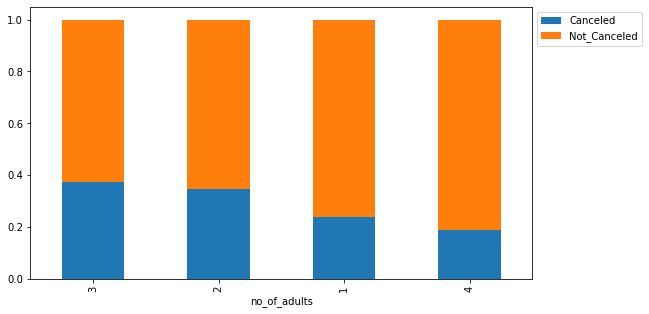

<IPython.core.display.Javascript object>

In [19]:
spousedf = df[(df.no_of_adults >= 1) & (df.no_of_children == 0)]  
stacked_barplot(spousedf, "no_of_adults", "booking_status")

del spousedf    # free memory

#### Observations:  

* The least number of cancellation where for a booking with 4 adults 
* The number of cancellations for 2 and 3 adults is roughly the same 
    * The overall cancellation level for 2 and 3 adults can be improved 
* The majority of the bookings (15506) that were not canceled where for rooms with 2 adults 

#### Number of Family Members

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            5            10     15
11                           1             0      1
12                           0             1      1
------------------------------------------------------------------------------------------------------------------------


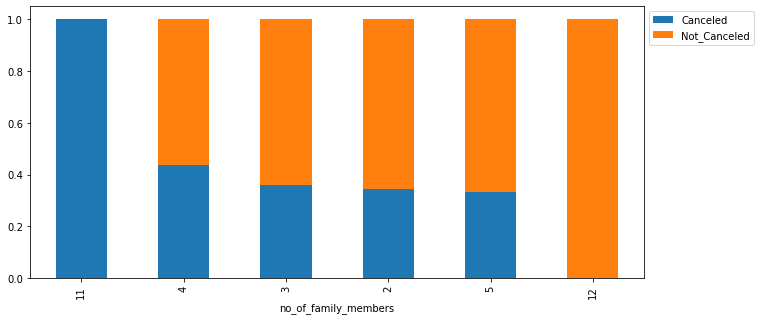

<IPython.core.display.Javascript object>

In [23]:
familydf["no_of_family_members"] = familydf["no_of_adults"] + familydf["no_of_children"]
stacked_barplot(familydf, "no_of_family_members", "booking_status")

#### Observations: 

* There is 1 reservation for 11 and another for 12 
    * My take is the reservation was made for a large family event 
    * The reservation for 11 was canceled and then rebooked for 12 
    * The large family event happened with the 12 people 
    * As this is a one off, no additional analysis is needed 
* Most family groups are between 2 and 5 members 
    * The cancellation rate is roughly the same for all family sizes 
* The most reservations are for 2 family members
    * Most likely 1 adult and 1 child 

#### Length of Hotel Stay


There are 17094 47.12% guests who stayed at least one night in the hotel
There are 19181 52.88% guests who did not stay at least one night in the hotel

booking_status  Canceled  Not_Canceled    All
total_days                                   
2                    639          1301   1940
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
6                    465           566   1031
7                    383           590    973
8                     79           100    179
9                     53            58    111
10                    58            51    109
11                    15            24     39
12                    15             9     24
13                    15             3     18
14                    27             5     32
15                    26             5     31
16                     5             1      6
17                     4             1      5
18                

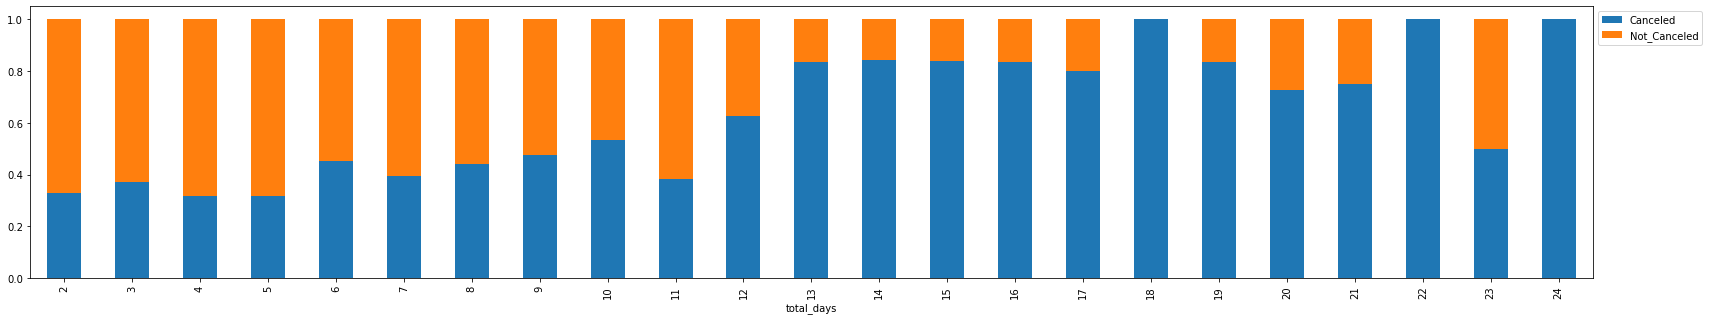

<IPython.core.display.Javascript object>

In [24]:
staydf = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
staydf["total_days"] = staydf["no_of_week_nights"] + staydf["no_of_weekend_nights"]

print(
    "\nThere are ",
    staydf.shape[0],
    " ",
    round((staydf.shape[0] / df.shape[0]) * 100, 2),
    "% guests who stayed at least one night in the hotel",
    sep="",
)
print(
    "There are ",
    df.shape[0] - staydf.shape[0],
    " ",
    round(((df.shape[0] - staydf.shape[0]) / df.shape[0]) * 100, 2),
    "% guests who did not stay at least one night in the hotel\n",
    sep="",
)

stacked_barplot_mine(staydf, "total_days", "booking_status")

del staydf  # free memory

#### Observations: 

Note: pay attention to the legend, the colors have changed.

* 52.88% guests who did not stay at least one night in the hotel
    * This is high
* 47.12% guests who stayed at least one night in the hotel
* Most of the stays were for between 2 and 5 days
* Roughly a third of the stays between 2 and 11 days were canceled 
* Most of the cancellations were for stays between 16 to 24 days 
    * However, there are fewer reservations for that length 

#### Repeat Guests and Booking Status 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


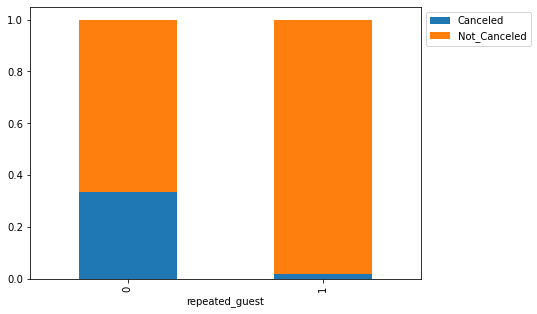

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(df, "repeated_guest", "booking_status")

#### Observations:  

* Most repeat customers did not cancel their reservations 
    * Shows the repeat customers liked the hotel and came back 
* About a third of new guests cancelled their reservation 
    * Since most reservations are made online, there is a good chance they found a better deal somewhere else 

#### Cancellations over Time

#### Notes: 

For the following, I wanted to look at the reservations over the entire time period as there is a difference between the numbers for the months in 2017 as opposed to the same months in 2018. 

The following code assigns a number to each year and month combination.  2017 and 7 is 1 and 2018 and 12 is 18. 

There is probably more elegant way to write the following code, but it works.  

In [18]:
%%time

monthsdf = df.copy()
monthsdf["long_month"] = ""

for i in range(36275):
    if monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 7:
        monthsdf.loc[i, "long_month"] = 1
    elif monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 8:
        monthsdf.loc[i, "long_month"] = 2
    elif monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 9:
        monthsdf.loc[i, "long_month"] = 3
    elif monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 10:
        monthsdf.loc[i, "long_month"] = 4
    elif monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 11:
        monthsdf.loc[i, "long_month"] = 5
    elif monthsdf.iloc[i, 8] == 2017 and monthsdf.iloc[i, 9] == 12:
        monthsdf.loc[i, "long_month"] = 6
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 1:
        monthsdf.loc[i, "long_month"] = 7
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 2:
        monthsdf.loc[i, "long_month"] = 8
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 3:
        monthsdf.loc[i, "long_month"] = 9
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 4:
        monthsdf.loc[i, "long_month"] = 10
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 5:
        monthsdf.loc[i, "long_month"] = 11
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 6:
        monthsdf.loc[i, "long_month"] = 12
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 7:
        monthsdf.loc[i, "long_month"] = 13
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 8:
        monthsdf.loc[i, "long_month"] = 14
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 9:
        monthsdf.loc[i, "long_month"] = 15
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 10:
        monthsdf.loc[i, "long_month"] = 16
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 11:
        monthsdf.loc[i, "long_month"] = 17
    elif monthsdf.iloc[i, 8] == 2018 and monthsdf.iloc[i, 9] == 12:
        monthsdf.loc[i, "long_month"] = 18


print('All Done!')     # message to confirm successful execution

All Done!
Wall time: 24.9 s


<IPython.core.display.Javascript object>

In [48]:
z = 0

print('Key for long month varaiable: \n')
for i in range(1,19) : 
    print('\t', month_year[z], 'is number', i)
    z += 1


Key for long month varaiable: 

	 2017_7 is number 1
	 2017_8 is number 2
	 2017_9 is number 3
	 2017_10 is number 4
	 2017_11 is number 5
	 2017_12 is number 6
	 2018_1 is number 7
	 2018_2 is number 8
	 2018_3 is number 9
	 2018_4 is number 10
	 2018_5 is number 11
	 2018_6 is number 12
	 2018_7 is number 13
	 2018_8 is number 14
	 2018_9 is number 15
	 2018_10 is number 16
	 2018_11 is number 17
	 2018_12 is number 18


<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
long_month                                   
1                    243           120    363
2                    185           829   1014
3                    182          1467   1649
4                    302          1611   1913
5                     27           620    647
6                     22           906    928
7                     24           990   1014
8                    430          1274   1704
9                    700          1658   2358
10                   995          1741   2736
11                   948          1650   2598
12                  1291          1912   3203
13                  1071          1486   2557
14                  1303          1496   2799
15                  1356          1606   2962
16                  1578          1826   3404
17                   848          1485   2333
18                   380          1713   2093
All                11885         24390  36275
----------------------------------

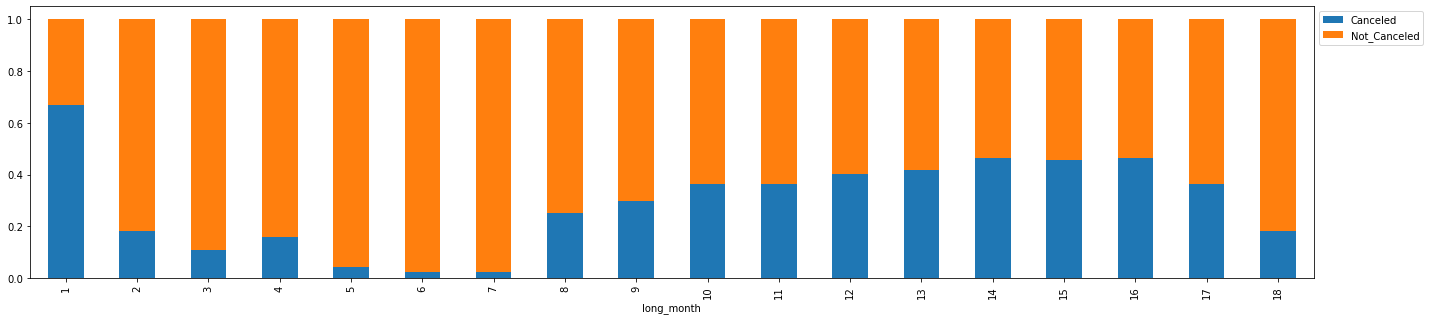

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot_mine(monthsdf, "long_month", "booking_status")

#### Observations: 

Note: The colors in the legend have changed.

* Very few cancellations between 2 (August 2017) and 8 (February 2018) 
* A high number of reservations in 2018 (numbers 7 - 18)

#### Average Price per Room over Time

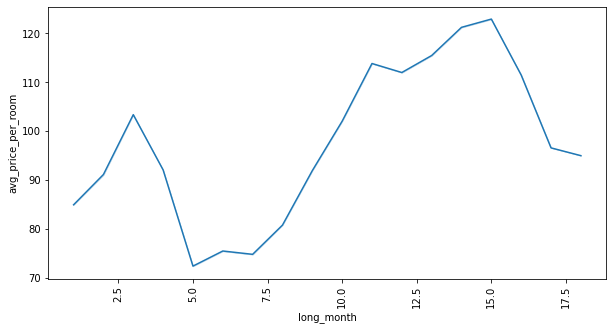

<IPython.core.display.Javascript object>

In [69]:
# This cell also uses the long_month data created in the last cell 

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(data=monthsdf, x="long_month", y="avg_price_per_room", markers=True, ci = False)
plt.show()


#### Observations: 

* The average price for a room was higher in 2018 than 2017 
* With a few exceptions the room price has stayed high 
* There is a dip in the price in November and December 2018 (months 17 and 18) 
    * This is to be expected 

In [39]:
# Code to get the total number of cancellations in the complete dataframe
# This will be used to compute the percentage of cancellations for each market segment

total_cancel = len(df.loc[df["booking_status"] == "Canceled"])
print("There are", total_cancel, "cancellations for all the reservations")

There are 11885 cancellations for all the reservations


<IPython.core.display.Javascript object>

#### Booking Status over time for Market Segment:  Aviation


There are 37 cancellations for this market segment which are 0.31% of the total cancellations



booking_status  Not_Canceled  Canceled  All
long_month                                 
8                          1         0    1
9                          3         0    3
10                        21         4   25
11                        10        19   29
12                         5         1    6
13                         2         0    2
15                        12         6   18
16                        26         3   29
17                         8         4   12
All                       88        37  125
------------------------------------------------------------------------------------------------------------------------


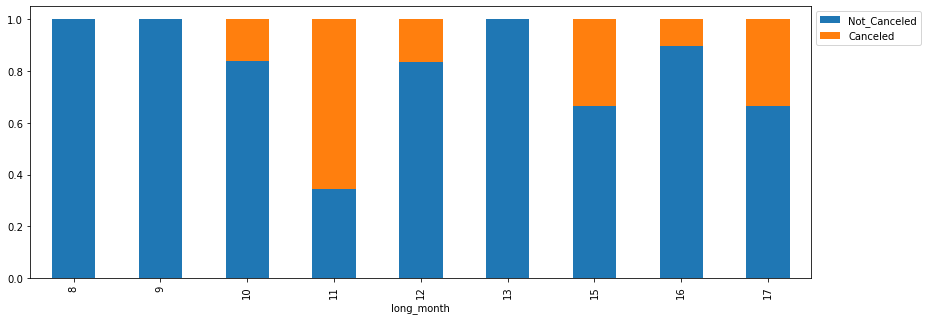

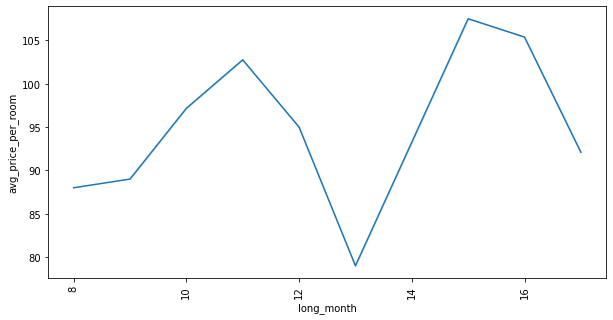

<IPython.core.display.Javascript object>

In [40]:
marketdf = monthsdf.loc[monthsdf["market_segment_type"] == "Aviation"]

segment_cancel = len(marketdf.loc[marketdf["booking_status"] == "Canceled"])
print(
    "\nThere are ",
    segment_cancel,
    " cancellations for this market segment which are ",
    round((segment_cancel / total_cancel) * 100, 2),
    "% of the total cancellations",
    sep="",
)
print("\n\n")  # for formatting

stacked_barplot_mine(marketdf, "long_month", "booking_status")

print("\n")

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(
    data=marketdf, x="long_month", y="avg_price_per_room", markers=True, ci=False
)
plt.show()

#### Observations: 

* The months run from February 2018 (month 8) to December 2018 (month 18)
* The lowest number of cancellations 0.31% of the total cancellations excluding Complementary rooms 
* With the exception of May 2018 (month 5), the majority of the reservations are used 
* Most non-canceled rooms in July 2018 (month 13)
* This could be a market to grow 

#### Booking Status over time for Market Segment: Complementary


There are 0 cancellations for this market segment which are 0.0% of the total cancellations



booking_status  Not_Canceled  All
long_month                       
1                          5    5
2                         37   37
3                         27   27
4                         22   22
5                         16   16
6                         32   32
7                         30   30
8                         18   18
9                         23   23
10                        12   12
11                        23   23
12                        21   21
13                        13   13
14                        11   11
15                        25   25
16                        23   23
17                        28   28
18                        25   25
All                      391  391
------------------------------------------------------------------------------------------------------------------------


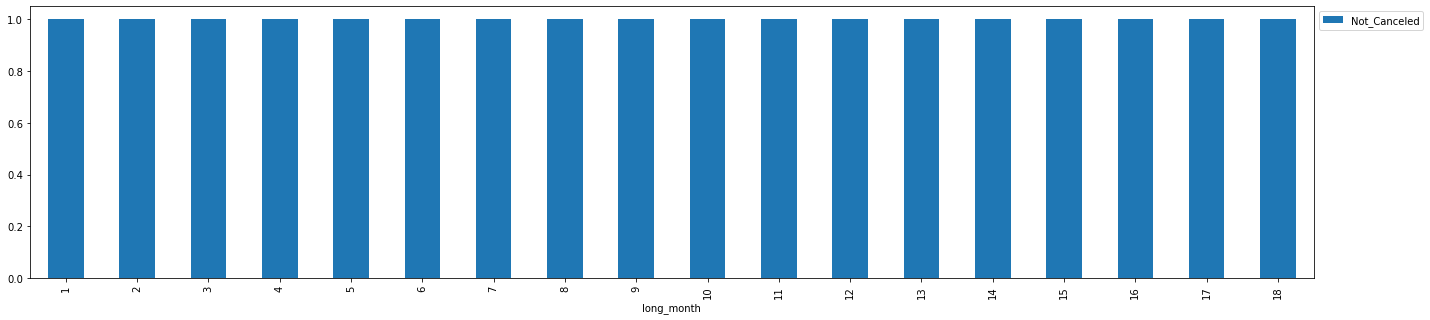

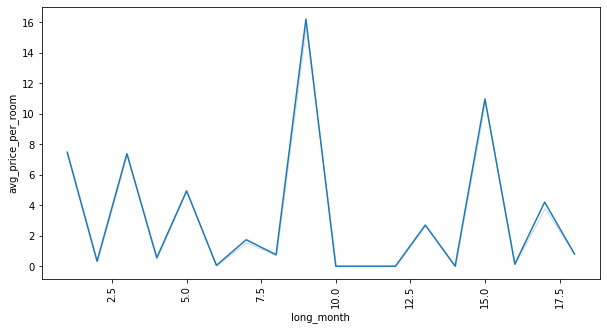

<IPython.core.display.Javascript object>

In [41]:
marketdf = monthsdf.loc[monthsdf["market_segment_type"] == "Complementary"]

segment_cancel = len(marketdf.loc[marketdf["booking_status"] == "Canceled"])
print(
    "\nThere are ",
    segment_cancel,
    " cancellations for this market segment which are ",
    round((segment_cancel / total_cancel) * 100, 2),
    "% of the total cancellations",
    sep="",
)
print("\n\n")  # for formatting


stacked_barplot_mine(marketdf, "long_month", "booking_status")

print("\n")

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(
    data=marketdf, x="long_month", y="avg_price_per_room", markers=True, ci=False
)
plt.show()

#### Observations: 

* There are no cancellations for Complementary rooms 
    * No surprise.  They are free stays! 
* Average price per room is low which is good -- less of a hit on the profit margin

#### Booking Status over time for Market Segment: Corporate


There are 220 cancellations for this market segment which are 1.85% of the total cancellations



booking_status  Canceled  Not_Canceled   All
long_month                                  
1                      0             4     4
2                     19            54    73
3                     14           119   133
4                      5           102   107
5                      5            83    88
6                      0            93    93
7                      6           100   106
8                     13           193   206
9                     11           156   167
10                     6            59    65
11                    66           153   219
12                    14            85    99
13                     8           101   109
14                     7            41    48
15                    18           107   125
16                    10           104   114
17                    18           129   147
18                     0           114   114
A

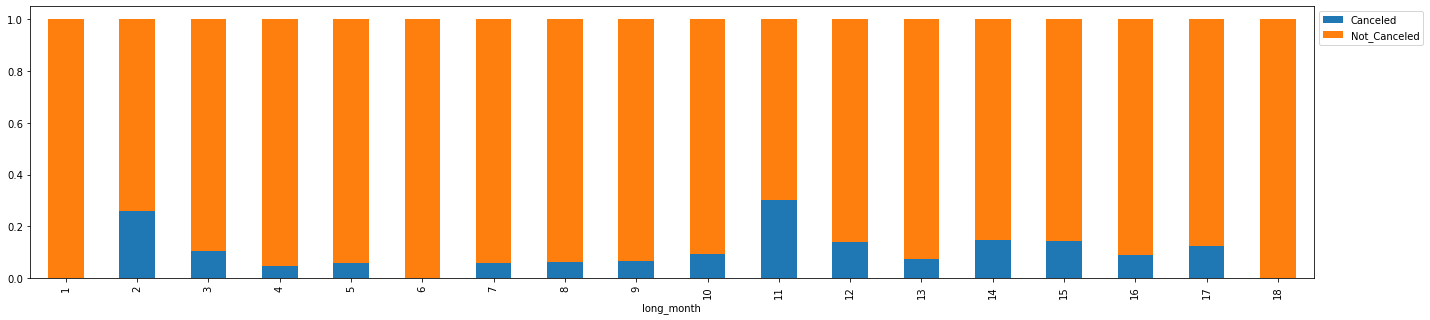

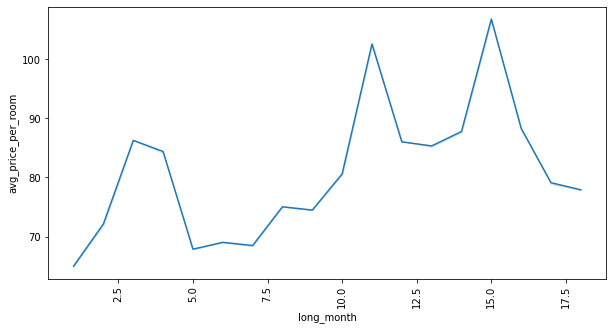

<IPython.core.display.Javascript object>

In [42]:
marketdf = monthsdf.loc[monthsdf["market_segment_type"] == "Corporate"]

segment_cancel = len(marketdf.loc[marketdf["booking_status"] == "Canceled"])
print(
    "\nThere are ",
    segment_cancel,
    " cancellations for this market segment which are ",
    round((segment_cancel / total_cancel) * 100, 2),
    "% of the total cancellations",
    sep="",
)
print("\n\n")  # for formatting


stacked_barplot_mine(marketdf, "long_month", "booking_status")

print("\n")

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(
    data=marketdf, x="long_month", y="avg_price_per_room", markers=True, ci=False
)
plt.show()

#### Observations:  

* Very few cancellations over the time period 
* Data would point to business travellers 
* Price per room was also high in 2018 (months 7 - 18) 
* Could be a market to grow -- maybe 

#### Booking Status over time for Market Segment: Offline


There are 3153 cancellations for this market segment which are 26.53% of the total cancellations



booking_status  Canceled  Not_Canceled    All
long_month                                   
1                     90            77    167
2                     56           287    343
3                     72           694    766
4                    197           817   1014
5                      0           274    274
6                      0           362    362
7                      0           314    314
8                    100           338    438
9                    111           427    538
10                   265           396    661
11                   220           431    651
12                   565           806   1371
13                   199           272    471
14                   117           280    397
15                   439           387    826
16                   466           588   1054
17                   255           272    527
18                     1 

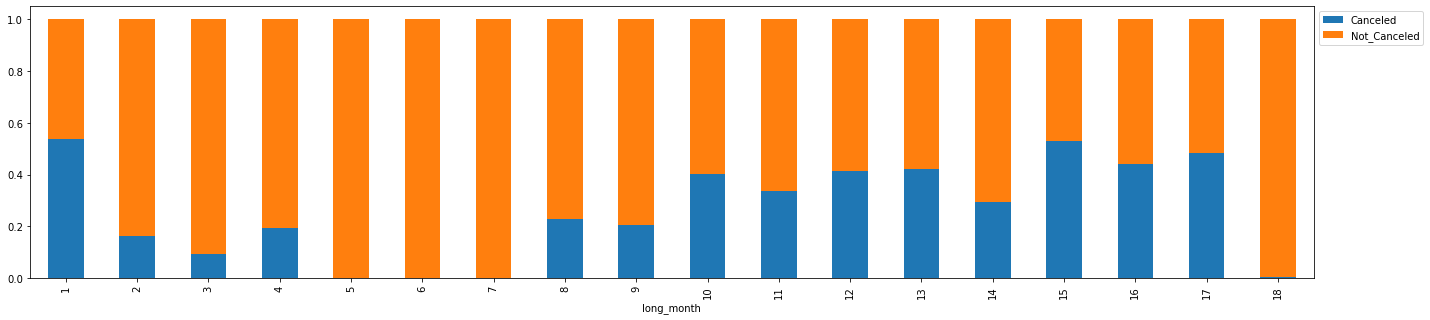

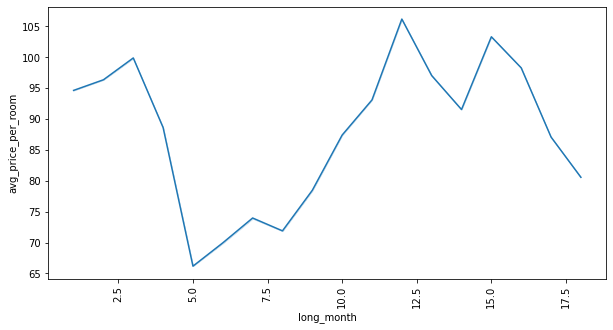

<IPython.core.display.Javascript object>

In [43]:
marketdf = monthsdf.loc[monthsdf["market_segment_type"] == "Offline"]

segment_cancel = len(marketdf.loc[marketdf["booking_status"] == "Canceled"])
print(
    "\nThere are ",
    segment_cancel,
    " cancellations for this market segment which are ",
    round((segment_cancel / total_cancel) * 100, 2),
    "% of the total cancellations",
    sep="",
)
print("\n\n")  # for formatting


stacked_barplot_mine(marketdf, "long_month", "booking_status")

print("\n")

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(
    data=marketdf, x="long_month", y="avg_price_per_room", markers=True, ci=False
)
plt.show()

#### Observations: 

* As pointed out in the URLs in the Background Information section, guest are more likely to stay at the hotel if they make the reservataion directly with the hotel
* 26.53% of the total cancellations is which is higher than the average of 14% 
    * Source: See the URLs in the Background Information section 
* The cancellations for this segment are lower than the Online market segment 
* The average cost of the room is also high for this market segment 
* This is an area for growth 

#### Booking Status over time for Market Segment: Online


There are 8475 cancellations for this market segment which are 71.31% of the total cancellations



booking_status  Canceled  Not_Canceled    All
long_month                                   
1                    153            34    187
2                    110           451    561
3                     96           627    723
4                    100           670    770
5                     22           247    269
6                     22           419    441
7                     18           546    564
8                    317           724   1041
9                    578          1049   1627
10                   720          1253   1973
11                   643          1033   1676
12                   711           995   1706
13                   864          1098   1962
14                  1179          1164   2343
15                   893          1075   1968
16                  1099          1085   2184
17                   571          1048   1619
18                   379 

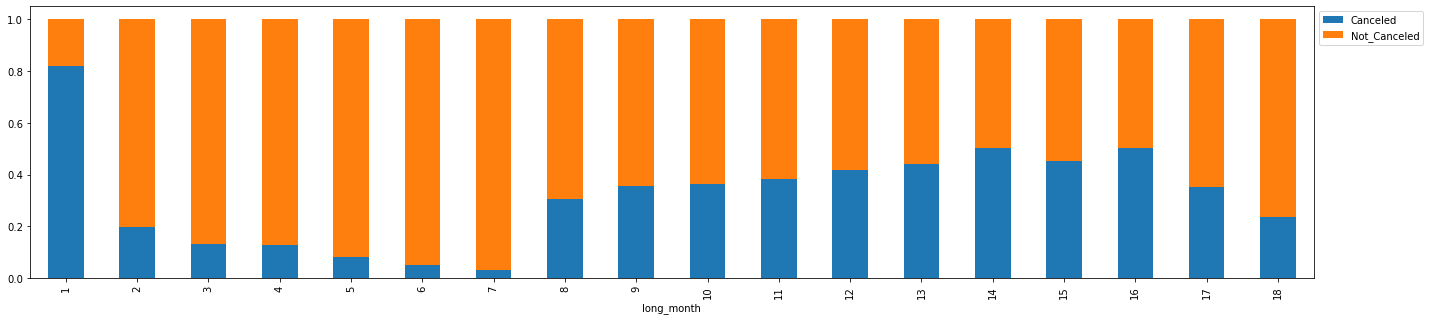

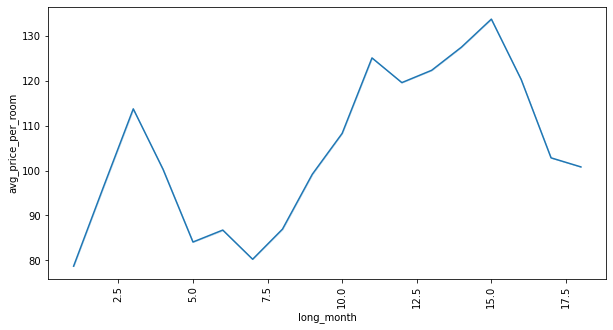

<IPython.core.display.Javascript object>

In [50]:
marketdf = monthsdf.loc[monthsdf["market_segment_type"] == "Online"]

segment_cancel = len(marketdf.loc[marketdf["booking_status"] == "Canceled"])
print(
    "\nThere are ",
    segment_cancel,
    " cancellations for this market segment which are ",
    round((segment_cancel / total_cancel) * 100, 2),
    "% of the total cancellations",
    sep="",
)
print("\n\n")  # for formatting


stacked_barplot_mine(marketdf, "long_month", "booking_status")

print("\n")

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(
    data=marketdf, x="long_month", y="avg_price_per_room", markers=True, ci=False
)
plt.show()

#### Observations: 

Note: Check the legend as the colors have changed 

* This segment has 71.31% of the total cancellations which is the largest by far 
    * Definite red flag 
* The cancellation rate is far higher than the average of 40% 
* A good number of cancellations in 2018 (7 - 18) 
* Average price of the room was also higher in 2018 (7 - 18)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [28]:
print('Before:')
print(df['booking_status'].unique())
print('\n')
df["booking_status"].replace('Canceled', 1, inplace=True)
df["booking_status"].replace('Not_Canceled', 0, inplace=True)
print('After:')
print(df['booking_status'].unique())

Before:
['Not_Canceled' 'Canceled']


After:
[0 1]


<IPython.core.display.Javascript object>

In [30]:
print("Check for Null Values and Percentage of rows that have null values")
pd.DataFrame(
    {
        "Count": df.isnull().sum()[df.isnull().sum() > 0],
        "Percentage": (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100,
    }
)

Check for Null Values and Percentage of rows that have null values


Empty DataFrame
Columns: [Count, Percentage]
Index: []

<IPython.core.display.Javascript object>

## Outlier Check

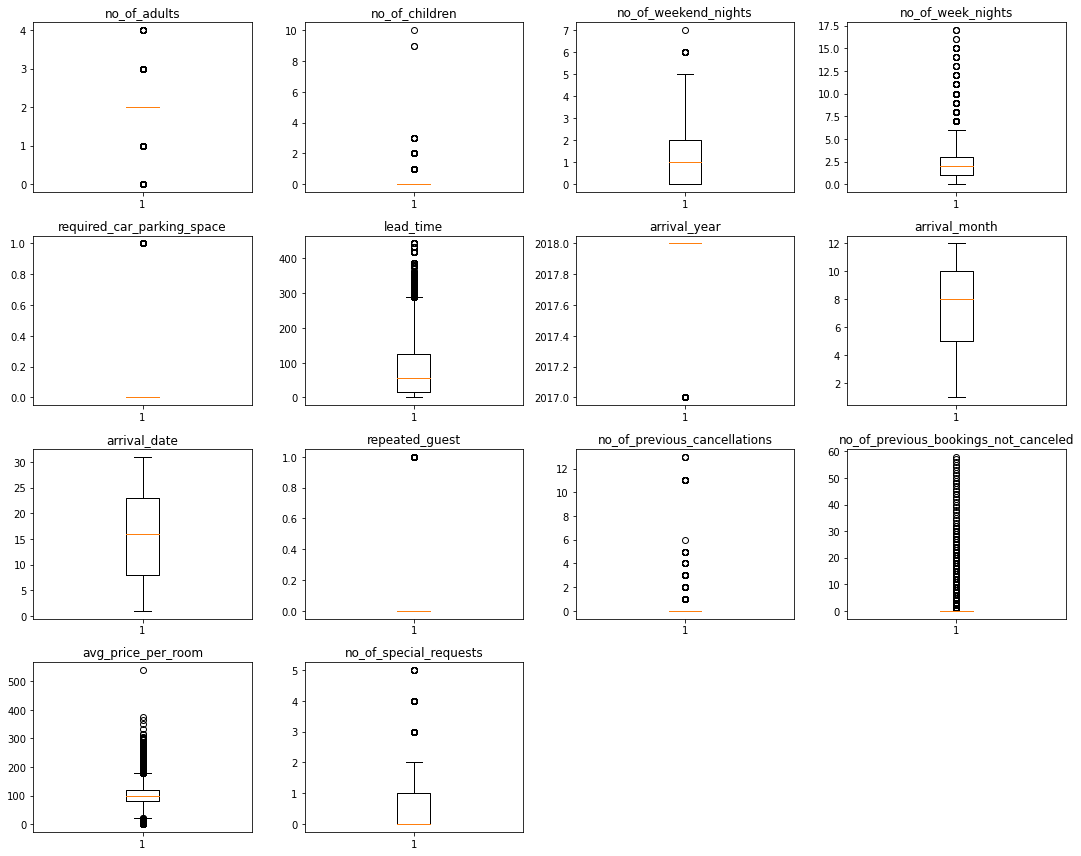

Wall time: 1.48 s


<IPython.core.display.Javascript object>

In [29]:
%%time                

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('booking_status')

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Outlier Treatment

I am not going to treat the outliers as it is inheritant in the data.  
Treating outliers would have a big change on the data and results. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

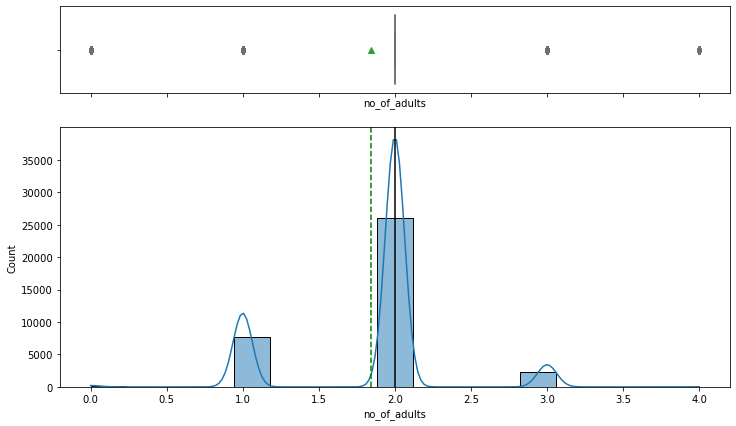

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "no_of_adults")

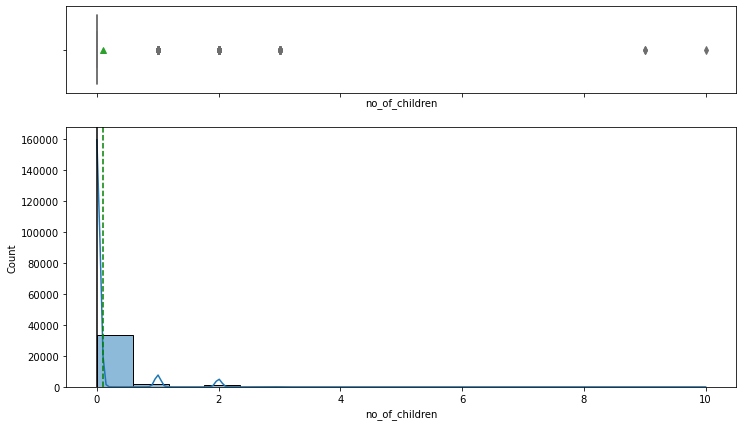

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "no_of_children")

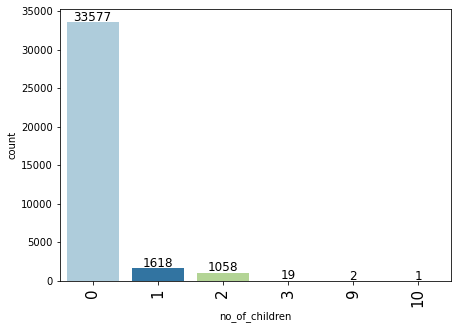

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "no_of_children")

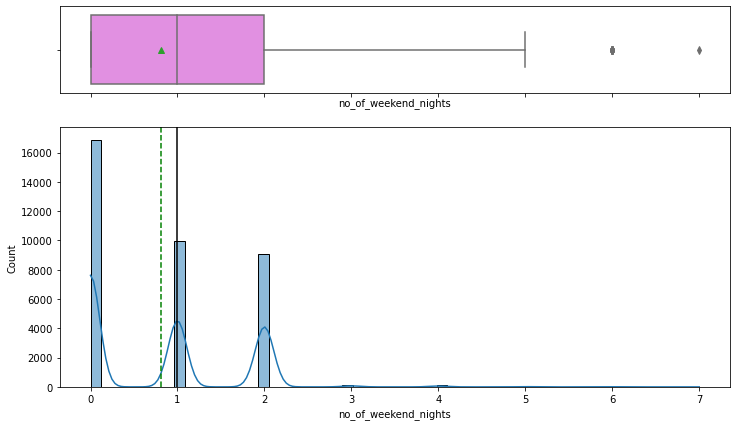

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "no_of_weekend_nights")

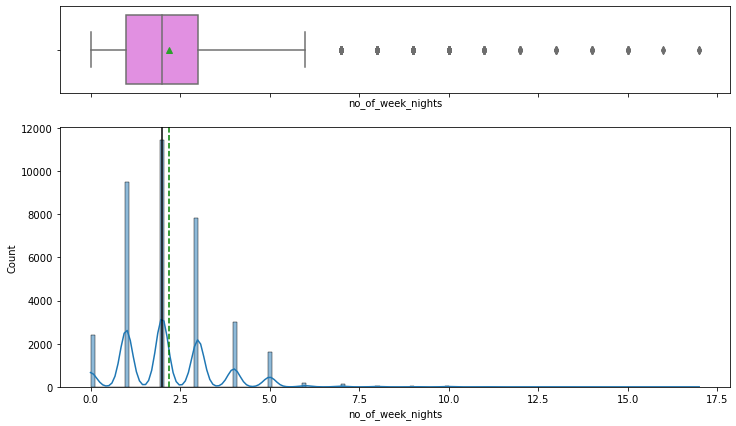

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(df, "no_of_week_nights")

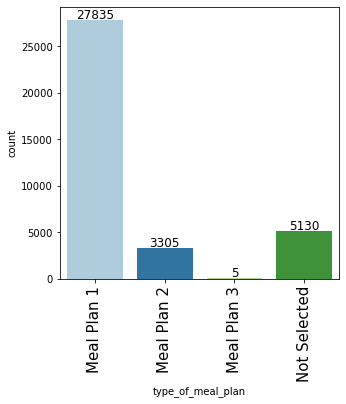

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "type_of_meal_plan")

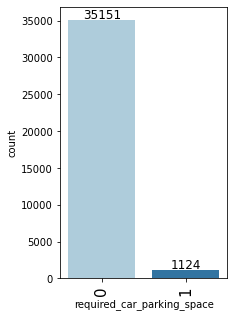

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "required_car_parking_space")

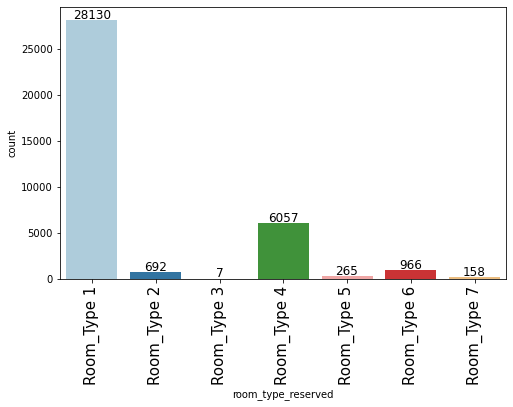

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "room_type_reserved")

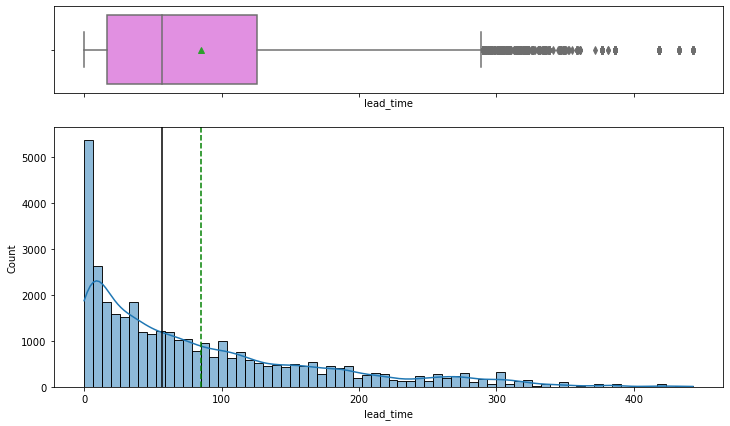

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(df, "lead_time")

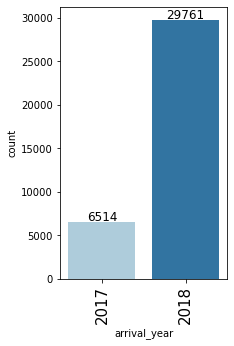

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "arrival_year")

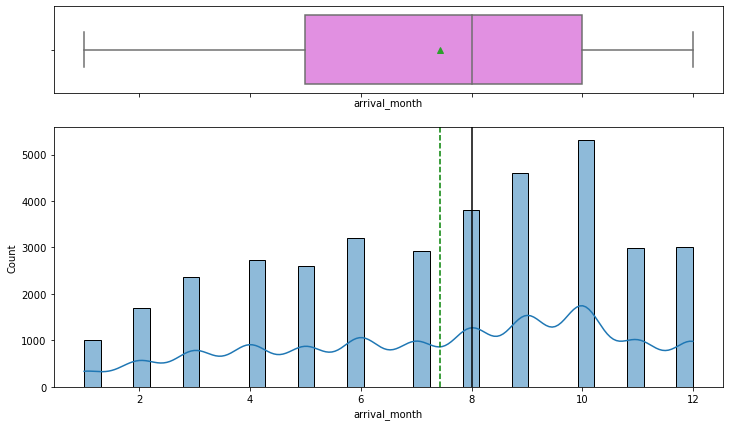

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df, "arrival_month")

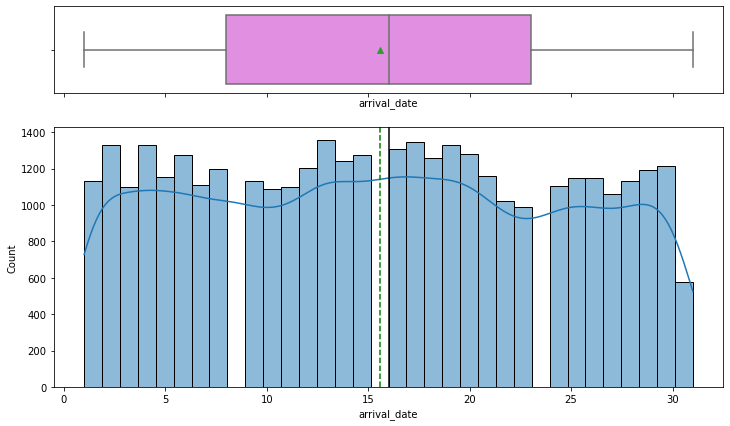

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(df, "arrival_date")

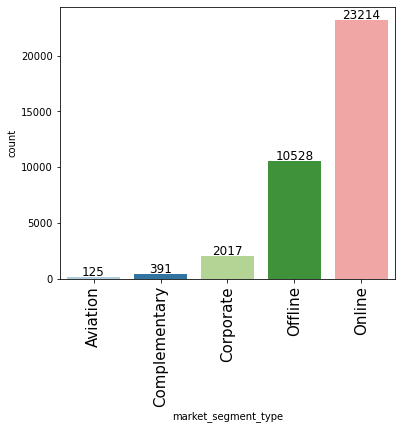

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df, "market_segment_type")

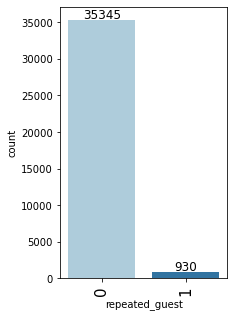

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(df, "repeated_guest")

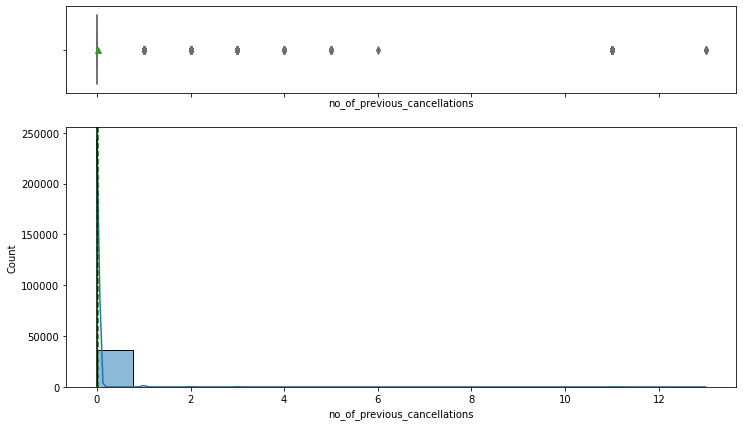

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(df, "no_of_previous_cancellations")

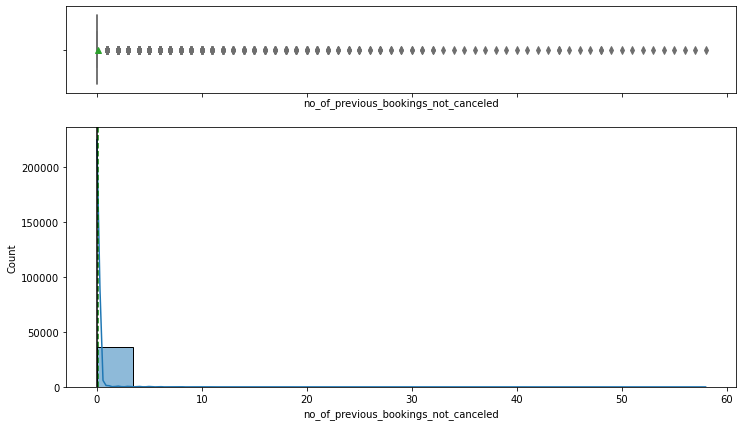

<IPython.core.display.Javascript object>

In [49]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

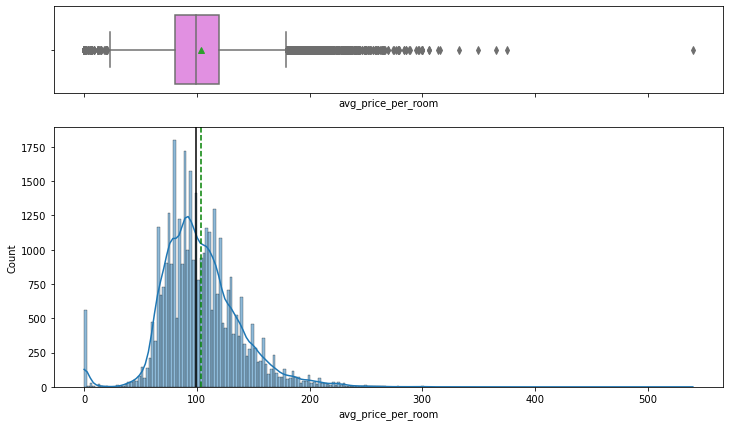

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(df, "avg_price_per_room")

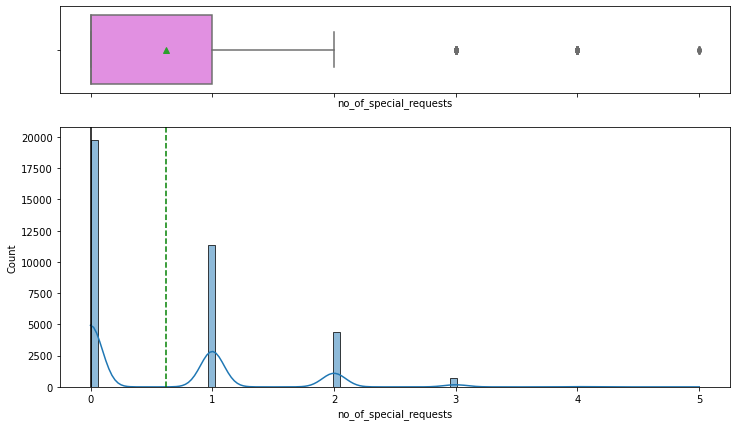

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(df, "no_of_special_requests")

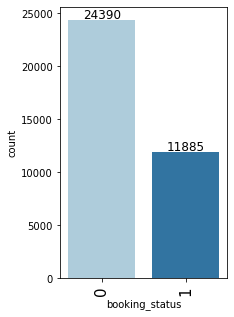

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(df, "booking_status")

## Data Preparation for Modeling

In [11]:
# Making backup copy of dataframe

# df.to_csv("C:/Users/David/temp/INNHotelsGroup_transformed.csv", index=False)


# Read command if needed
df = pd.read_csv("C:/Users/David/temp/INNHotelsGroup_transformed.csv")

<IPython.core.display.Javascript object>

### Split the data

In [12]:
# Independent variables
X = df.drop(["booking_status"], axis=1)
# Dependent variable
Y = df["booking_status"]

print("Independent Variables")
print(X.head())
print("\n\nDependent Variable")
Y.head()

Independent Variables
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  ar

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

### Add intercept to independent variables

In [13]:
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

### Create Dummy Variables

In [14]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0             10             2  ...                               0   
1             11             6  ...                               0   
2              2            28  ...                               0   
3              5            20  ...                               0   
4              4            11  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

<IPython.core.display.Javascript object>

### Split the independent data 70:30 into train and test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [16]:
print(
    "For training data, there are",
    X_train.shape[0],
    "rows and",
    X_train.shape[1],
    "columns.",
)
print(
    "For test data, there are",
    X_test.shape[0],
    "rows and",
    X_test.shape[1],
    "columns.",
)

For training data, there are 25392 rows and 28 columns.
For test data, there are 10883 rows and 28 columns.


<IPython.core.display.Javascript object>

In [17]:
# fitting logistic regression model

logit = sm.Logit(Y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.3293
Time:                        13:33:08   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.389    -687.795
no_of_adults                             0.1135      

<IPython.core.display.Javascript object>

In [18]:
baseline = model_performance_classification_statsmodels(lg, X_train, Y_train)
print("Training performance:")
baseline.T

# I find the results easier to read when the data is transposed

Training performance:


0
Accuracy   0.806041
Recall     0.634222
Precision  0.739749
F1         0.682933

<IPython.core.display.Javascript object>

In [19]:
models_train_comp_df["Baseline"] = pd.concat([baseline.T,], axis=1,)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline
Accuracy   0.806041
Recall     0.634222
Precision  0.739749
F1         0.682933

<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [20]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)

vif_series = vif_series.sort_values(ascending=False)

print("Series before feature selection: \n\n{}\n".format(vif_series))

print("Results from 1 to 27 not in scientific notation")
for i in range(1, 28):
    print(vif_series[i])

Series before feature selection: 

const                                   3.946816e+07
market_segment_type_Online              7.117643e+01
market_segment_type_Offline             6.411392e+01
market_segment_type_Corporate           1.692844e+01
market_segment_type_Complementary       4.500109e+00
avg_price_per_room                      2.050421e+00
no_of_children                          1.978229e+00
room_type_reserved_Room_Type 6          1.973072e+00
repeated_guest                          1.783516e+00
no_of_previous_bookings_not_canceled    1.651986e+00
arrival_year                            1.430830e+00
no_of_previous_cancellations            1.395689e+00
lead_time                               1.394914e+00
room_type_reserved_Room_Type 4          1.361515e+00
no_of_adults                            1.348154e+00
arrival_month                           1.275673e+00
type_of_meal_plan_Not Selected          1.272183e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
no_of_speci

<IPython.core.display.Javascript object>

Columns with a high VIF value are: 
* market_segment_type_Online              7.117643e+01
* market_segment_type_Offline             6.411392e+01
* market_segment_type_Corporate           1.692844e+01

As the market_segment_type column is a category, the VIF values can be ignored.  
This is documented in the notebook: IncomeGroupClassification_CaseStudy_DSBA.ipynb in the Multicollinearity section. 

### Dropping high p-value variables

In [21]:
psort = lg.pvalues
print("Baseline of columns and p-values in decending order:")
psort.sort_values(ascending=False)

Baseline of columns and p-values in decending order:
Wall time: 999 µs


market_segment_type_Complementary        9.999603e-01
room_type_reserved_Room_Type 3           9.994569e-01
type_of_meal_plan_Meal Plan 3            9.971860e-01
arrival_date                             8.011248e-01
no_of_previous_bookings_not_canceled     2.581156e-01
market_segment_type_Online               1.122205e-01
type_of_meal_plan_Meal Plan 2            7.945680e-03
no_of_children                           6.301360e-03
room_type_reserved_Room_Type 2           5.768894e-03
no_of_adults                             2.551918e-03
no_of_previous_cancellations             1.880538e-03
no_of_week_nights                        1.198894e-03
room_type_reserved_Room_Type 5           5.987149e-04
repeated_guest                           1.417291e-04
market_segment_type_Corporate            7.223417e-06
room_type_reserved_Room_Type 7           1.870797e-06
type_of_meal_plan_Not Selected           1.561671e-07
room_type_reserved_Room_Type 4           1.126905e-07
no_of_weekend_nights        

<IPython.core.display.Javascript object>

In [22]:
# Wrote while loop since there are many columns and it is hard to pick out the highest p-value
# Besides, make the computer do the work!

collist = X_train.columns.tolist()
print("List of columns with p-values greater than 0.05 that are being dropped:\n")
i = 0

while len(collist) > 0:
    vals = lg.pvalues
    max_vals = max(vals)
    if max_vals > 0.05:
        colname = vals.idxmax()
        print(colname, "\t", max_vals)
        X_train = X_train.drop([colname], axis=1)
        collist.remove(colname)
        i += 1
        logit = sm.Logit(Y_train, X_train.astype(float))
        lg = logit.fit(disp=False)
    else:
        break

print("\nAll Done!  Dropped", i, "columns")

List of columns with p-values greater than 0.05 that are being dropped:

market_segment_type_Complementary 	 0.9999602968231939
room_type_reserved_Room_Type 3 	 0.9408412238826953
arrival_date 	 0.8390734594798591
market_segment_type_Online 	 0.6361037960698985
no_of_previous_bookings_not_canceled 	 0.2565821344794933
type_of_meal_plan_Meal Plan 3 	 0.2129931685803249

All Done!  Dropped 6 columns


<IPython.core.display.Javascript object>

In [23]:
diff_cols = X_test.columns.difference(X_train.columns)
print("These columns are different between the training and test datatframes: \n")
print(diff_cols)

These columns are different between the training and test datatframes: 

Index(['arrival_date', 'market_segment_type_Complementary',
       'market_segment_type_Online', 'no_of_previous_bookings_not_canceled',
       'room_type_reserved_Room_Type 3', 'type_of_meal_plan_Meal Plan 3'],
      dtype='object')


<IPython.core.display.Javascript object>

In [24]:
diff_cols = diff_cols.tolist()

<IPython.core.display.Javascript object>

In [25]:
X_test = X_test.drop(diff_cols, axis=1)

<IPython.core.display.Javascript object>

In [26]:
X_test.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline'],
      dtype='object')

<IPython.core.display.Javascript object>

In [27]:
# fitting logistic regression model

logit2 = sm.Logit(Y_train, X_train.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.3283
Time:                        13:33:49   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

<IPython.core.display.Javascript object>

In [28]:
drop_p_df = model_performance_classification_statsmodels(lg2, X_train, Y_train)
print("Training performance:")
drop_p_df.T

Training performance:


0
Accuracy   0.805411
Recall     0.632548
Precision  0.739033
F1         0.681657

<IPython.core.display.Javascript object>

In [29]:
models_train_comp_df["Drop_p-Values"] = pd.concat([baseline.T,], axis=1,)


print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline  Drop_p-Values
Accuracy   0.806041       0.806041
Recall     0.634222       0.634222
Precision  0.739749       0.739749
F1         0.682933       0.682933

<IPython.core.display.Javascript object>

#### Observations:

* Not much change in all the measurements between Baseline and dropping the p-Values 

In [200]:
# Making backup copy of dataframes

X_train.to_csv("C:/Users/David/temp/X_train_no_pvalues.csv", index=False)
X_test.to_csv("C:/Users/David/temp/X_test_no_pvalues.csv", index=False)
Y_train.to_csv("C:/Users/David/temp/Y_train_no_pvalues.csv", index=False)
Y_test.to_csv("C:/Users/David/temp/Y_test_no_pvalues.csv", index=False)

<IPython.core.display.Javascript object>

## Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [30]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0      1.114754        1.164360              1.114753   
Change_odd% -100.0     11.475363       16.436009             11.475256   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042636                    0.203048   1.015835   
Change_odd%           4.263629                  -79.695231   1.583521   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.573235       0.958528        0.064797   
Change_odd%     57.323511      -4.147245      -93.520258   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257157            1.019348   
Change_odd%                     25.715665            1.934790   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229941                       1.179916   
Change_odd%              -77.005947                      17.991562   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.330892                        0.700461   
Change_odd%                       33.089244                      -29.953888   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753830                        0.479403   
Change_odd%                      -24.617006                      -52.059666   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.380991                        0.239033   
Change_odd%                      -61.900934                      -76.096691   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.452584                     0.167504  
Change_odd%                     -54.741616                   -83.249628

<IPython.core.display.Javascript object>

## Checking model performance on the training set

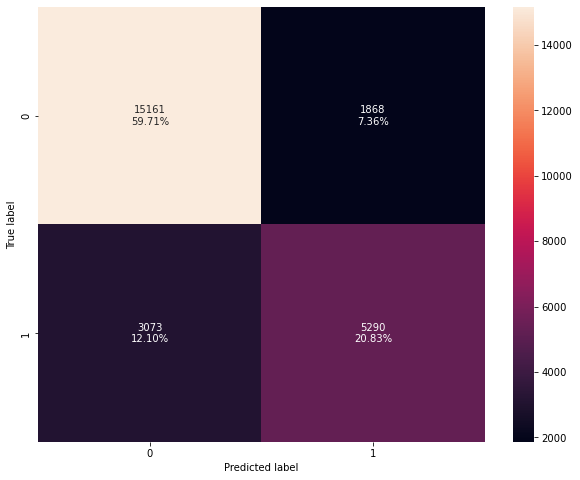

<IPython.core.display.Javascript object>

In [31]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train, Y_train)

In [32]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train, Y_train
)

print("Training performance:")
log_reg_model_train_perf.T

Training performance:


0
Accuracy   0.805411
Recall     0.632548
Precision  0.739033
F1         0.681657

<IPython.core.display.Javascript object>

In [33]:
models_train_comp_df["Logistic Regression-default Threshold (0.5)"] = pd.concat(
    [log_reg_model_train_perf.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline  Drop_p-Values  \
Accuracy   0.806041       0.806041   
Recall     0.634222       0.634222   
Precision  0.739749       0.739749   
F1         0.682933       0.682933   

           Logistic Regression-default Threshold (0.5)  
Accuracy                                      0.805411  
Recall                                        0.632548  
Precision                                     0.739033  
F1                                            0.681657

<IPython.core.display.Javascript object>

#### Observations: 

* Some change in the merics with the default threshold of 0.5, but not much chaange 

#### ROC-AUC

* ROC-AUC on training set

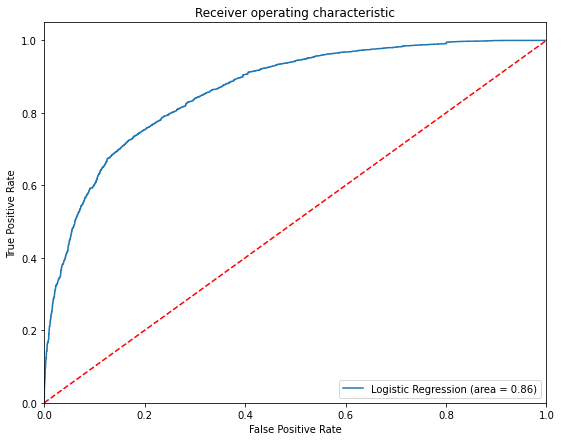

<IPython.core.display.Javascript object>

In [34]:
logit_roc_auc_train = roc_auc_score(Y_train, lg2.predict(X_train))
fpr, tpr, thresholds = roc_curve(Y_train, lg2.predict(X_train))
plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Optimal threshold using AUC-ROC curve

In [35]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(Y_train, lg2.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3710466623488743


<IPython.core.display.Javascript object>

#### Observations: 

* The best false positive rate to use is: 0.3710

### Checking model performance on training set

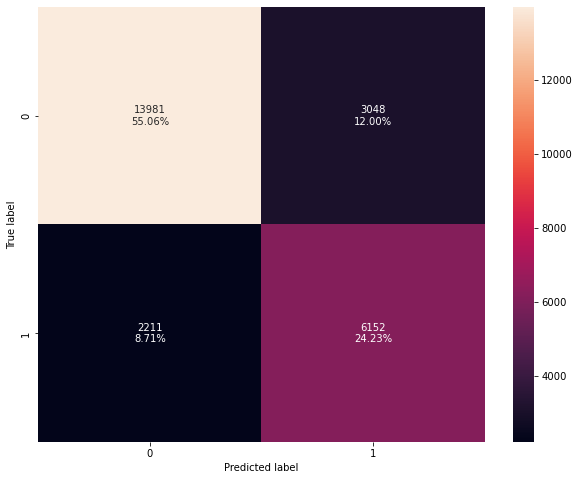

<IPython.core.display.Javascript object>

In [36]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train, Y_train, threshold=optimal_threshold_auc_roc)

In [37]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train, Y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc.T

Training performance:


0
Accuracy   0.792888
Recall     0.735621
Precision  0.668696
F1         0.700564

<IPython.core.display.Javascript object>

In [38]:
models_train_comp_df["Logistic Regression-0.37 Threshold"] = pd.concat(
    [log_reg_model_train_perf_threshold_auc_roc.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline  Drop_p-Values  \
Accuracy   0.806041       0.806041   
Recall     0.634222       0.634222   
Precision  0.739749       0.739749   
F1         0.682933       0.682933   

           Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805411   
Recall                                        0.632548   
Precision                                     0.739033   
F1                                            0.681657   

           Logistic Regression-0.37 Threshold  
Accuracy                             0.792888  
Recall                               0.735621  
Precision                            0.668696  
F1                                   0.700564

<IPython.core.display.Javascript object>

#### Observations: 

* Recall went up 
* Precision went down 
* F1 went up  
<br>
* Model is getting stronger 

## Precision-Recall curve to see if there is a better threshold

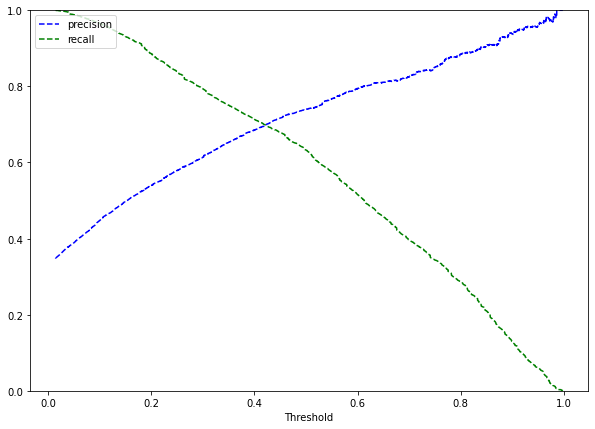

<IPython.core.display.Javascript object>

In [39]:
Y_scores = lg2.predict(X_train)
prec, rec, tre = precision_recall_curve(Y_train, Y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [40]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

### Checking model performance on training set

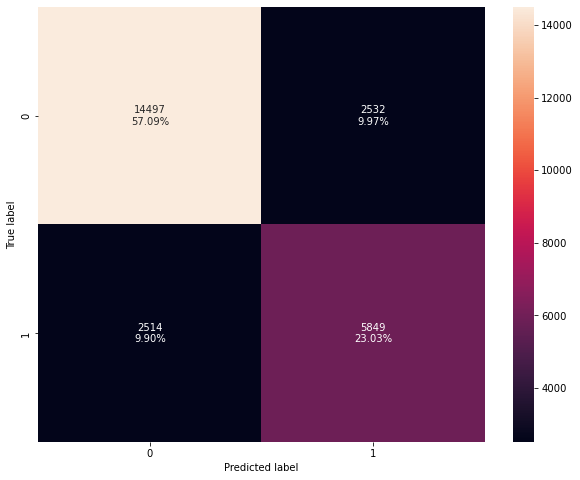

<IPython.core.display.Javascript object>

In [41]:
confusion_matrix_statsmodels(lg2, X_train, Y_train, threshold=optimal_threshold_curve)

In [42]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train, Y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve.T

Training performance:


0
Accuracy   0.801276
Recall     0.699390
Precision  0.697888
F1         0.698638

<IPython.core.display.Javascript object>

In [43]:
models_train_comp_df["Logistic Regression-0.42 Threshold"] = pd.concat(
    [log_reg_model_train_perf_threshold_curve.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline  Drop_p-Values  \
Accuracy   0.806041       0.806041   
Recall     0.634222       0.634222   
Precision  0.739749       0.739749   
F1         0.682933       0.682933   

           Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805411   
Recall                                        0.632548   
Precision                                     0.739033   
F1                                            0.681657   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792888   
Recall                               0.735621   
Precision                            0.668696   
F1                                   0.700564   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801276  
Recall                               0.699390  
Precision                            0.697888  
F1                                   0.698638

<IPython.core.display.Javascript object>

#### Observations: 

* Recall, Precision, and F1 are very close to each other -- close enough to say they are the same 
* Accuracy is at 80%  

This is the model to use! 

## Check the performance on the test set

#### Using model with default threshold

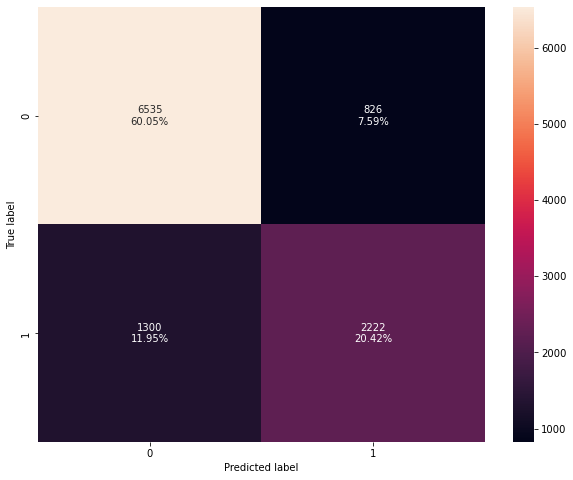

<IPython.core.display.Javascript object>

In [44]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test, Y_test)

In [45]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test, Y_test
)

print("Test performance:")
log_reg_model_test_perf.T

Test performance:


0
Accuracy   0.804649
Recall     0.630892
Precision  0.729003
F1         0.676408

<IPython.core.display.Javascript object>

In [46]:
models_test_comp_df["Logistic Regression-default Threshold (0.5)"] = pd.concat([log_reg_model_test_perf.T], axis=1,)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold (0.5)
Accuracy                                      0.804649
Recall                                        0.630892
Precision                                     0.729003
F1                                            0.676408

<IPython.core.display.Javascript object>

#### ROC curve on test set

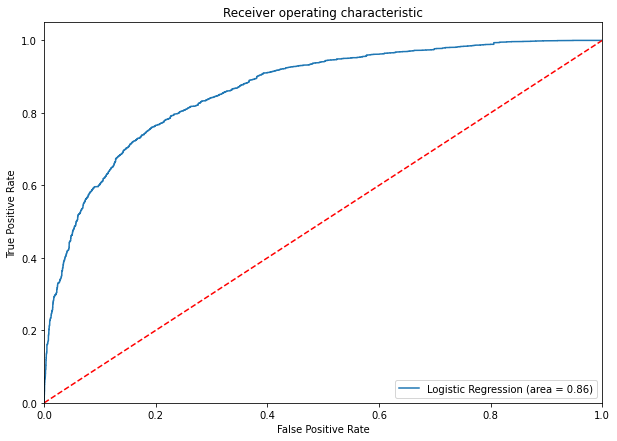

<IPython.core.display.Javascript object>

In [47]:
logit_roc_auc_train = roc_auc_score(Y_test, lg2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lg2.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

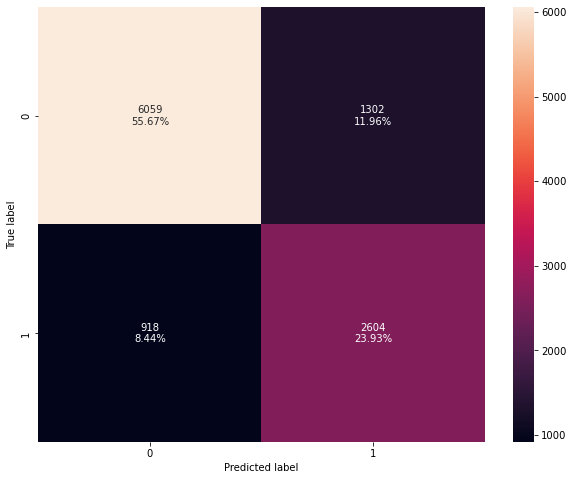

<IPython.core.display.Javascript object>

In [48]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test, Y_test, threshold=optimal_threshold_auc_roc)

In [49]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test, Y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc.T

Test performance:


0
Accuracy   0.796012
Recall     0.739353
Precision  0.666667
F1         0.701131

<IPython.core.display.Javascript object>

In [50]:
models_test_comp_df["Logistic Regression-0.37 Threshold"] = pd.concat(
    [log_reg_model_test_perf_threshold_auc_roc.T], axis=1,
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.37 Threshold  
Accuracy                             0.796012  
Recall                               0.739353  
Precision                            0.666667  
F1                                   0.701131

<IPython.core.display.Javascript object>

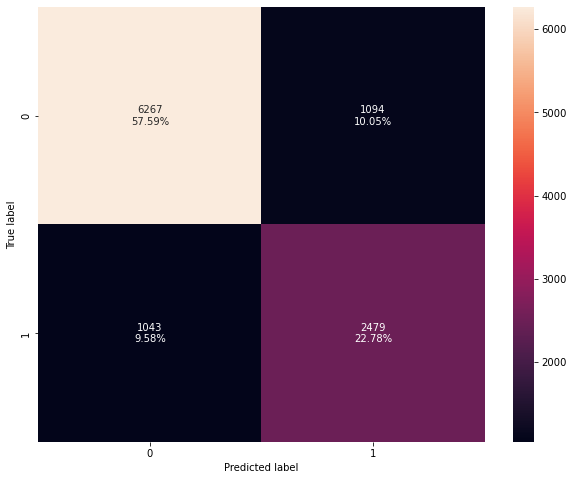

<IPython.core.display.Javascript object>

In [51]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test, Y_test, threshold=optimal_threshold_curve)

In [52]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test, Y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve.T

Test performance:


0
Accuracy   0.803639
Recall     0.703861
Precision  0.693815
F1         0.698802

<IPython.core.display.Javascript object>

In [53]:
models_test_comp_df["Logistic Regression-0.42 Threshold"] = pd.concat(
    [log_reg_model_test_perf_threshold_curve.T], axis=1,
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.796012   
Recall                               0.739353   
Precision                            0.666667   
F1                                   0.701131   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.803639  
Recall                               0.703861  
Precision                            0.693815  
F1                                   0.698802

<IPython.core.display.Javascript object>

#### Observations:  

* Recall, Precision, and F1 are basically the same between train and test 
* Accuracy is also the same between train and test 

The model with a threshold of 0.42 is the model to use! 

## Final Model Summary

In [59]:
print("Train and test performance comparison:")

print("Train performance:")
# print(models_train_comp_df)
display(models_train_comp_df)

print("\n\nTest performance:")
# print(models_test_comp_df)
display(models_test_comp_df)

Train and test performance comparison:
Train performance:


Baseline  Drop_p-Values  \
Accuracy   0.806041       0.806041   
Recall     0.634222       0.634222   
Precision  0.739749       0.739749   
F1         0.682933       0.682933   

           Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805411   
Recall                                        0.632548   
Precision                                     0.739033   
F1                                            0.681657   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792888   
Recall                               0.735621   
Precision                            0.668696   
F1                                   0.700564   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801276  
Recall                               0.699390  
Precision                            0.697888  
F1                                   0.698638



Test performance:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.796012   
Recall                               0.739353   
Precision                            0.666667   
F1                                   0.701131   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.803639  
Recall                               0.703861  
Precision                            0.693815  
F1                                   0.698802

<IPython.core.display.Javascript object>

#### Observations:  

* Recall, Precision, and F1 are basically the same between train and test 
* Accuracy is also the same between train and test 

The model with a threshold of 0.42 is the model to use! 

## Building a Decision Tree model

In [60]:
# DataFrame to hold results of model performance

models_train_comp_df = pd.DataFrame()
models_test_comp_df = pd.DataFrame()

<IPython.core.display.Javascript object>

In [61]:
# Making backup copy of dataframe

# df.to_csv("C:/Users/David/temp/INNHotelsGroup_transformed.csv", index=False)


# Read command if needed
df = pd.read_csv("C:/Users/David/temp/INNHotelsGroup_transformed.csv")

<IPython.core.display.Javascript object>

In [62]:
# Independent variables
X = df.drop(["booking_status"], axis=1)
# Dependent variable
Y = df["booking_status"]

print("Independent Variables")
print(X.head())
print("\n\nDependent Variable")
Y.head()

Independent Variables
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  ar

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [64]:
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [65]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0

<IPython.core.display.Javascript object>

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [67]:
print(
    "For training data, there are",
    X_train.shape[0],
    "rows and",
    X_train.shape[1],
    "columns.",
)
print(
    "For test data, there are",
    X_test.shape[0],
    "rows and",
    X_test.shape[1],
    "columns.",
)

For training data, there are 25392 rows and 28 columns.
For test data, there are 10883 rows and 28 columns.


<IPython.core.display.Javascript object>

#### Build Decision Tree Model

In [70]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training Set

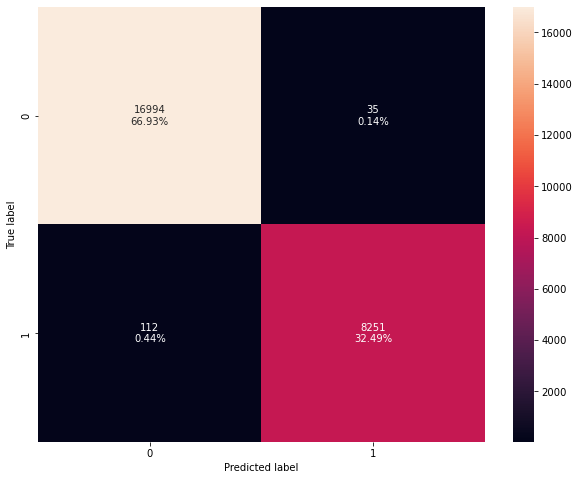

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(dTree, X_train, Y_train)

In [74]:
decision_tree_perf_train = model_performance_classification_sklearn(dTree, X_train, Y_train)
decision_tree_perf_train.T

0
Accuracy   0.994211
Recall     0.986608
Precision  0.995776
F1         0.991171

<IPython.core.display.Javascript object>

In [75]:
models_train_comp_df["Baseline Performance"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline Performance
Accuracy               0.994211
Recall                 0.986608
Precision              0.995776
F1                     0.991171

<IPython.core.display.Javascript object>

#### Observations: 

Of course, the metrics are all great since the decision tree is completely overfit

#### Check Performance on Test Set

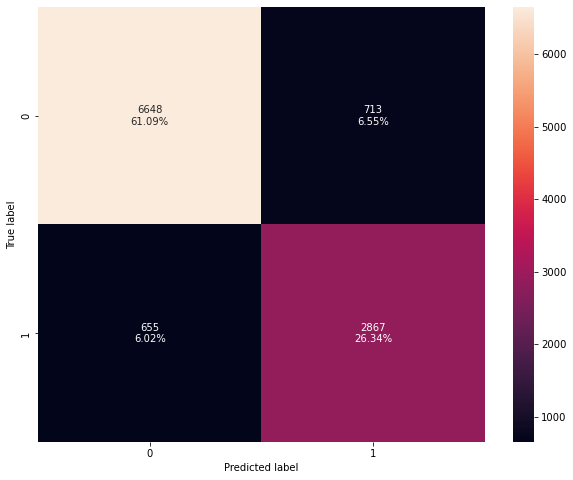

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(dTree, X_test, Y_test)

In [83]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, Y_test
)
decision_tree_perf_test.T

0
Accuracy   0.874299
Recall     0.814026
Precision  0.800838
F1         0.807378

<IPython.core.display.Javascript object>

In [84]:
models_test_comp_df["Baseline Performance"] = pd.concat(
    [decision_tree_perf_test.T], axis=1,
)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


Baseline Performance
Accuracy               0.874299
Recall                 0.814026
Precision              0.800838
F1                     0.807378

<IPython.core.display.Javascript object>

#### Observations: 

Overfit in the test data 

#### Visualize Decision Tree

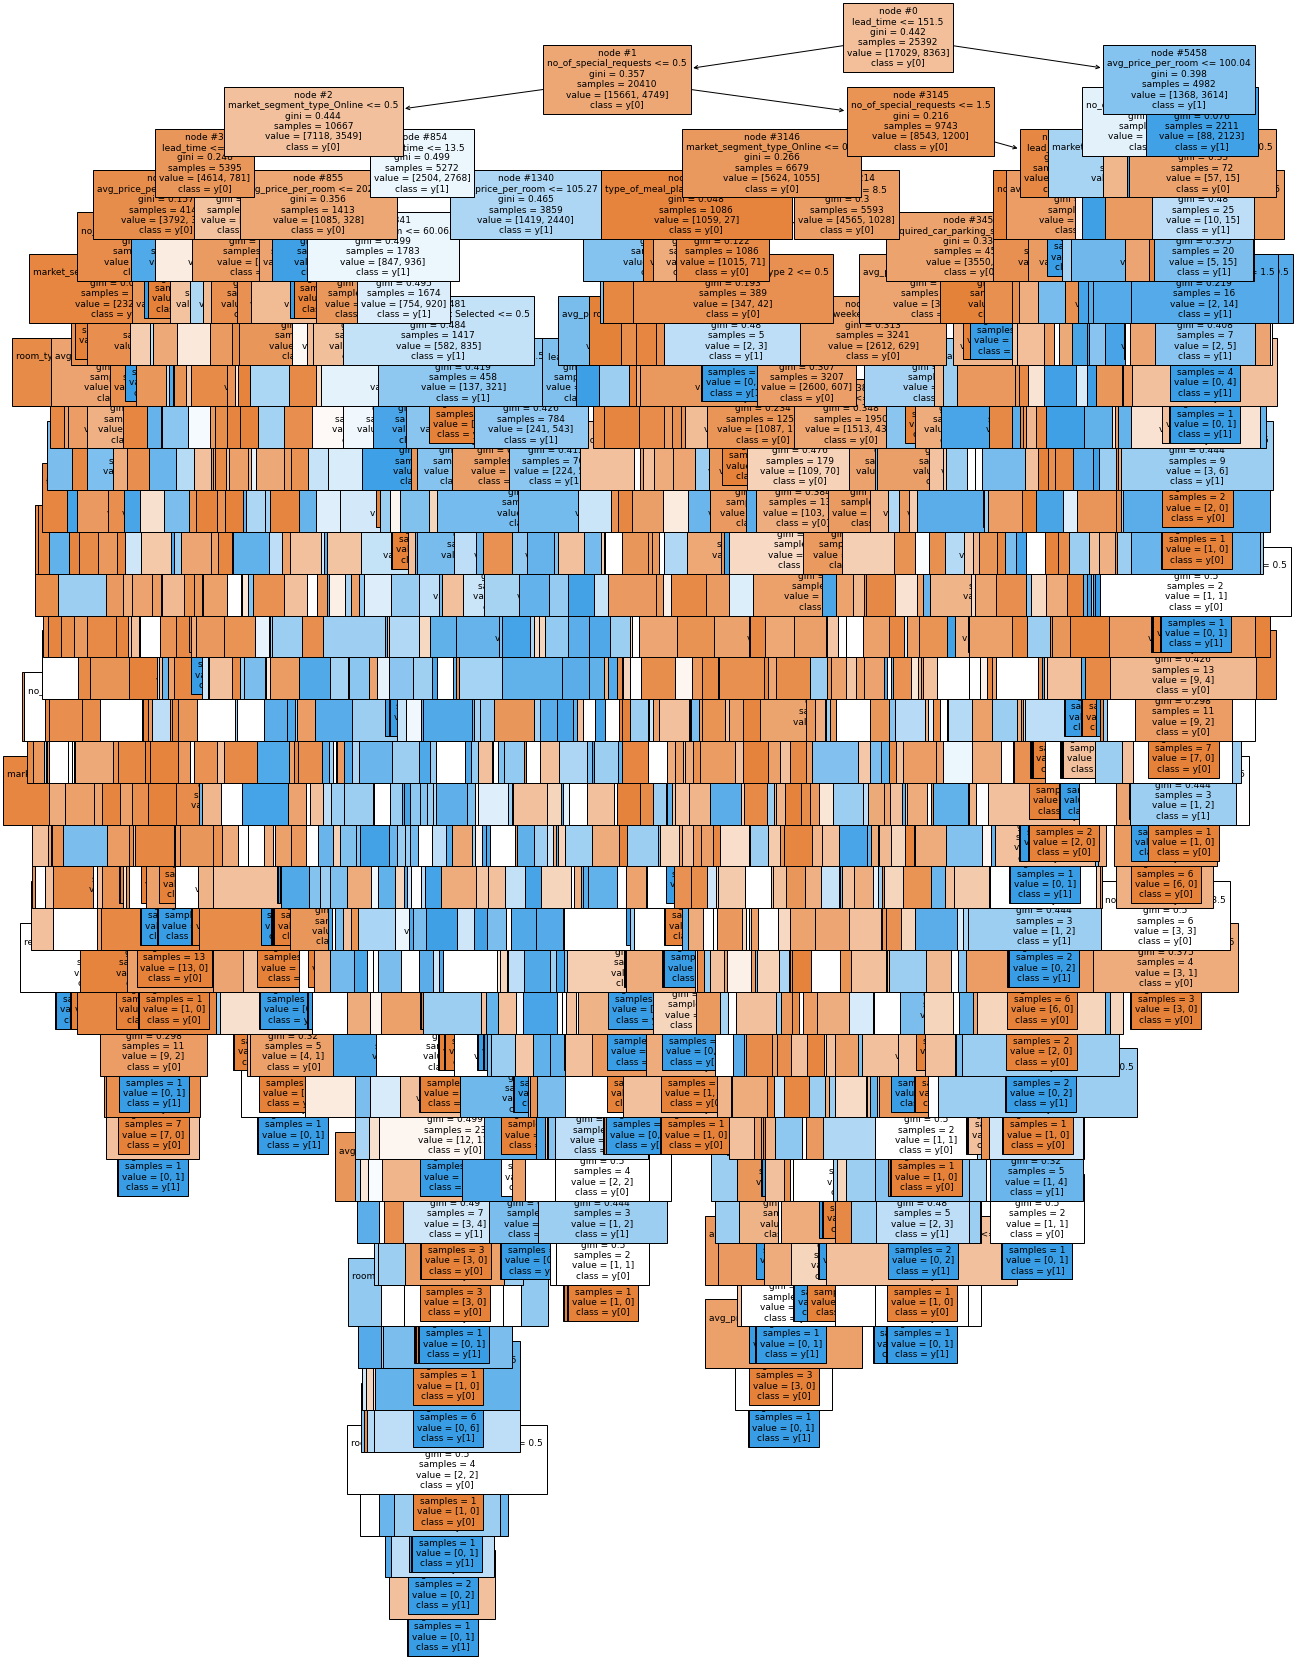

<IPython.core.display.Javascript object>

Wall time: 3min 4s


In [77]:
%%time

feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Observations: 

* WOW! This is a big, complex tree! 
* 3 minutes and 4 seconds to render
* Get the chainsaw!  It is time to prune this tree! 

In [78]:
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.350648
avg_price_per_room                    0.175731
market_segment_type_Online            0.094067
arrival_date                          0.086234
no_of_special_requests                0.068116
arrival_month                         0.066867
no_of_week_nights                     0.044743
no_of_weekend_nights                  0.038139
no_of_adults                          0.026223
arrival_year                          0.011607
type_of_meal_plan_Not Selected        0.008490
required_car_parking_space            0.007140
room_type_reserved_Room_Type 4        0.006211
type_of_meal_plan_Meal Plan 2         0.003719
no_of_children                        0.003303
market_segment_type_Offline           0.002507
room_type_reserved_Room_Type 2        0.002141
room_type_reserved_Room_Type 5        0.001774
market_segment_type_Corporate         0.000626
repeated_guest                        0.000453
room_type_res

<IPython.core.display.Javascript object>

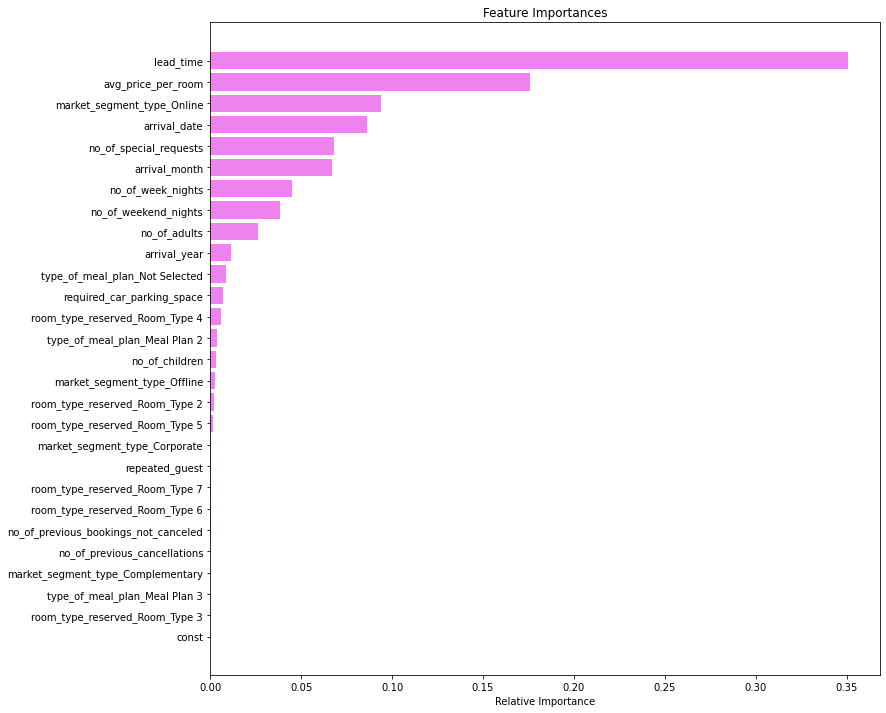

Wall time: 200 ms


<IPython.core.display.Javascript object>

In [79]:
%%time

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations: 

There are many columns that have little or no relative importance.  They can be pruned. 

### Pruning the tree

#### Pre-Pruning using GridSearchCV

In [81]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Check Performance on Training Set

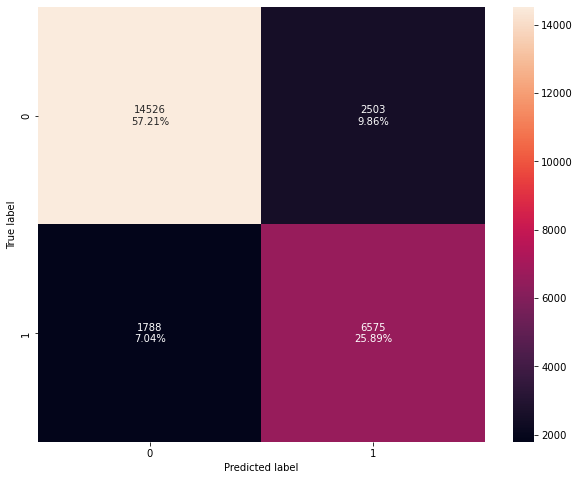

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(estimator, X_train, Y_train)

In [93]:
decision_tree_perf_train = model_performance_classification_sklearn(
    estimator, X_train, Y_train
)
decision_tree_perf_train.T

0
Accuracy   0.831010
Recall     0.786201
Precision  0.724278
F1         0.753971

<IPython.core.display.Javascript object>

In [94]:
models_train_comp_df["Pre-Prune"] = pd.concat([decision_tree_perf_train.T], axis=1,)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline Performance  Pre-Prune
Accuracy               0.994211   0.831010
Recall                 0.986608   0.786201
Precision              0.995776   0.724278
F1                     0.991171   0.753971

<IPython.core.display.Javascript object>

#### Observations:  

* The metrics are better in the Pre-Prune decision tree, but are still high

#### Check Performance on Test Set

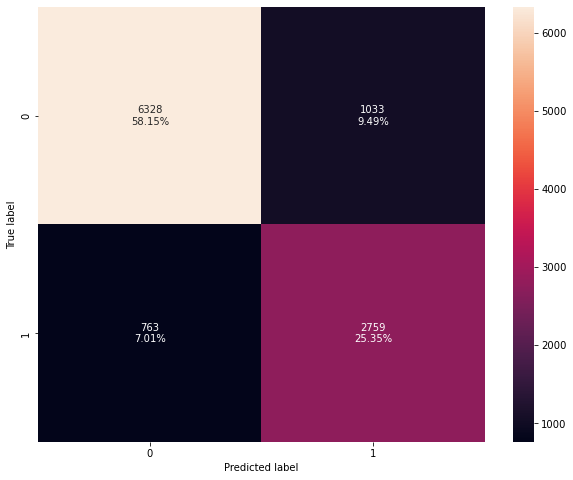

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(estimator, X_test, Y_test)

In [96]:
decision_tree_perf_test = model_performance_classification_sklearn(
    estimator, X_test, Y_test
)
decision_tree_perf_test.T

0
Accuracy   0.834972
Recall     0.783362
Precision  0.727584
F1         0.754444

<IPython.core.display.Javascript object>

In [97]:
models_test_comp_df["Pre-Prune"] = pd.concat([decision_tree_perf_test.T], axis=1,)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


Baseline Performance  Pre-Prune
Accuracy               0.874299   0.834972
Recall                 0.814026   0.783362
Precision              0.800838   0.727584
F1                     0.807378   0.754444

<IPython.core.display.Javascript object>

#### Observations:  

* The metrics are better in the Pre-Prune decision tree, but are still high

#### Visualize Decision Tree

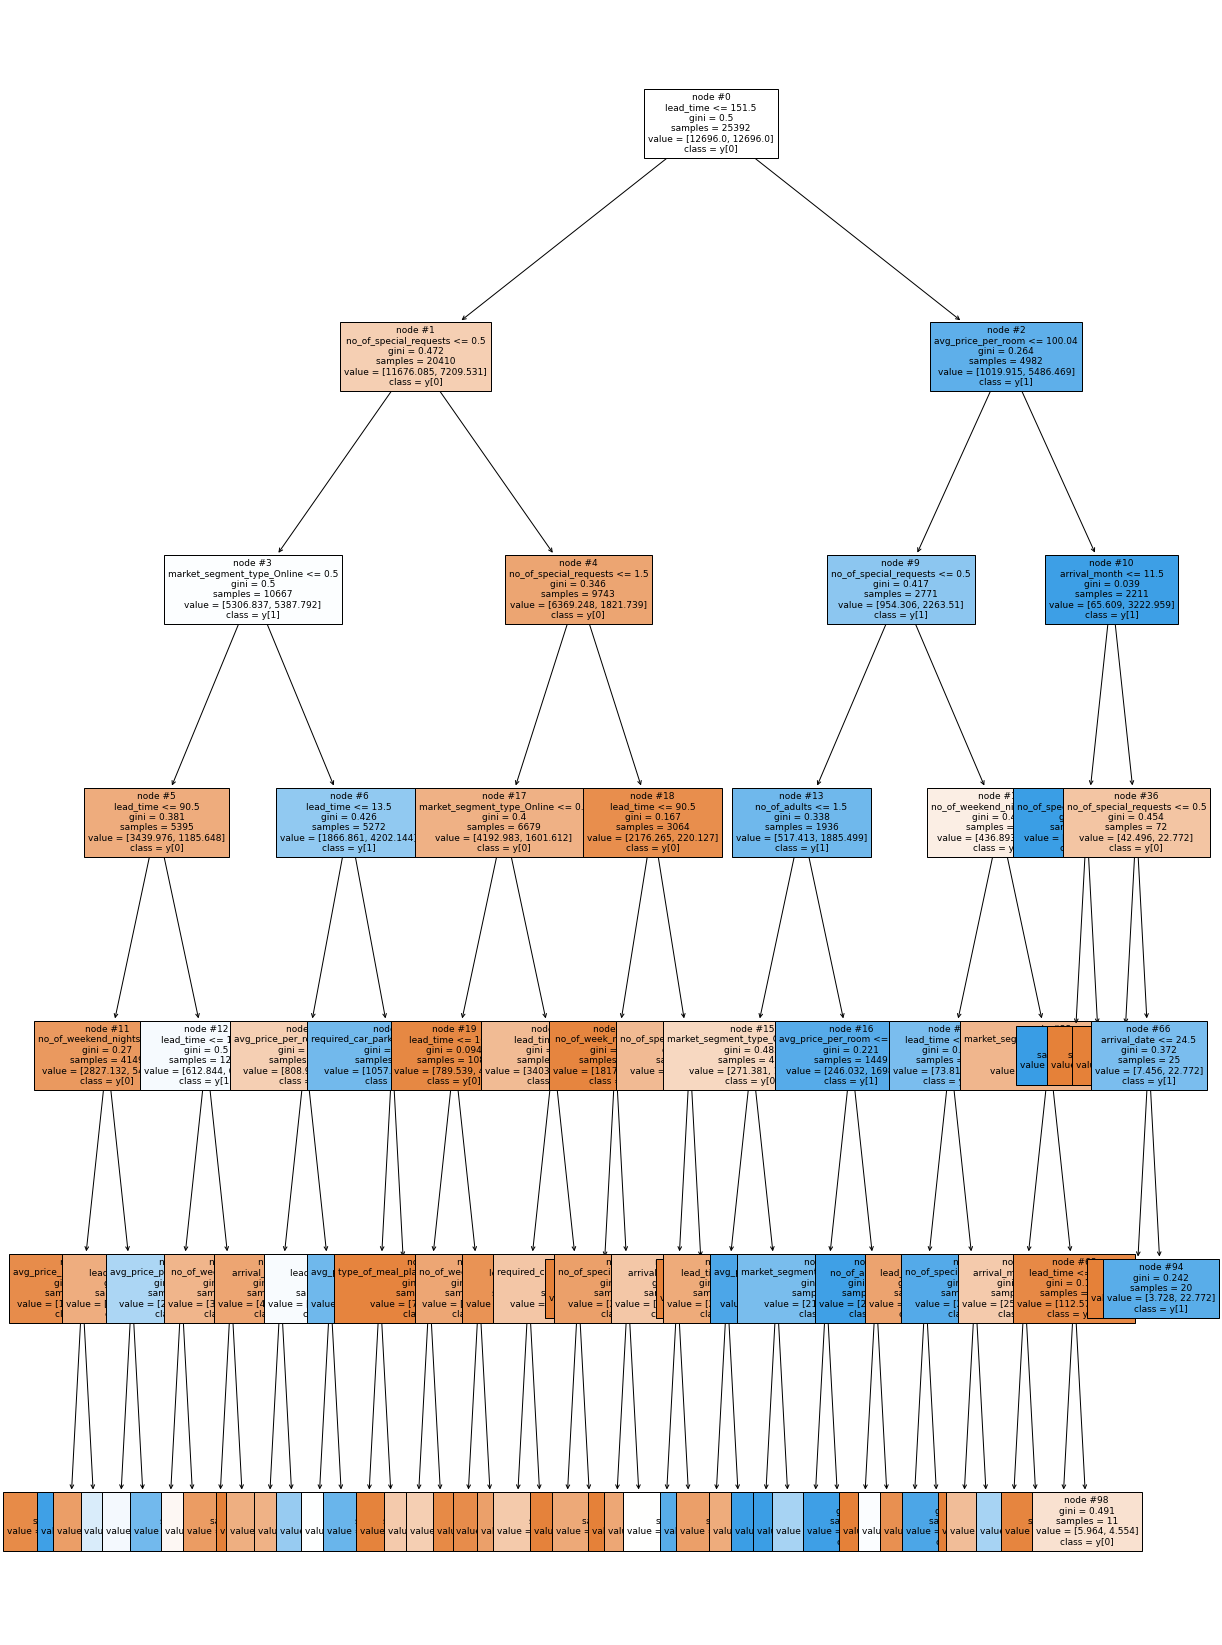

Wall time: 3.58 s


<IPython.core.display.Javascript object>

In [99]:
%%time

feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Observations: 

* The tree is simpler and rendered in much faster time 
* It looks like the model will work, but it could be too simple

In [100]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.475546
market_segment_type_Online            0.184597
no_of_special_requests                0.169176
avg_price_per_room                    0.076233
no_of_adults                          0.026919
no_of_weekend_nights                  0.020589
arrival_month                         0.014125
required_car_parking_space            0.014101
market_segment_type_Offline           0.010007
no_of_week_nights                     0.006999
type_of_meal_plan_Not Selected        0.000950
arrival_date                          0.000760
room_type_reserved_Room_Type 3        0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
type_of_meal_plan_Meal Plan 2         0.000000
room_type_res

<IPython.core.display.Javascript object>

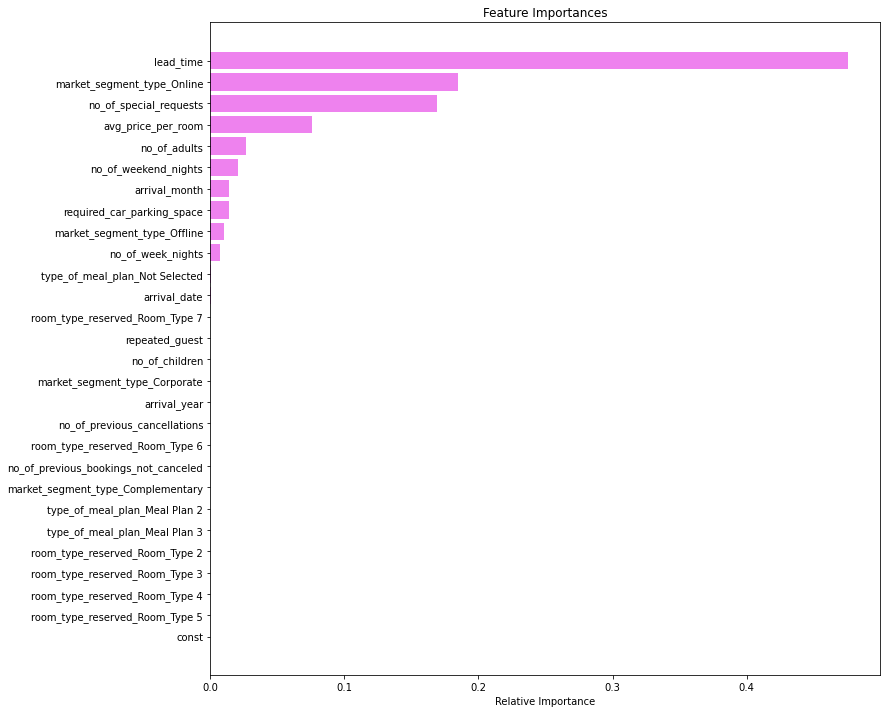

<IPython.core.display.Javascript object>

In [101]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:  

* There are more columns that have little relative importance 

#### Cost Complexity Pruning

In [102]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [103]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007572
1     4.327745e-07    0.007573
2     4.688391e-07    0.007573
3     5.329960e-07    0.007574
4     6.133547e-07    0.007575
...            ...         ...
1342  6.665684e-03    0.286897
1343  1.304480e-02    0.299942
1344  1.725993e-02    0.317202
1345  2.399048e-02    0.365183
1346  7.657789e-02    0.441761

[1347 rows x 2 columns]

<IPython.core.display.Javascript object>

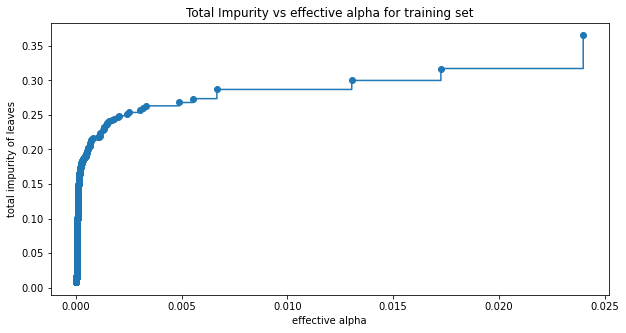

<IPython.core.display.Javascript object>

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [105]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07657789477371368


<IPython.core.display.Javascript object>

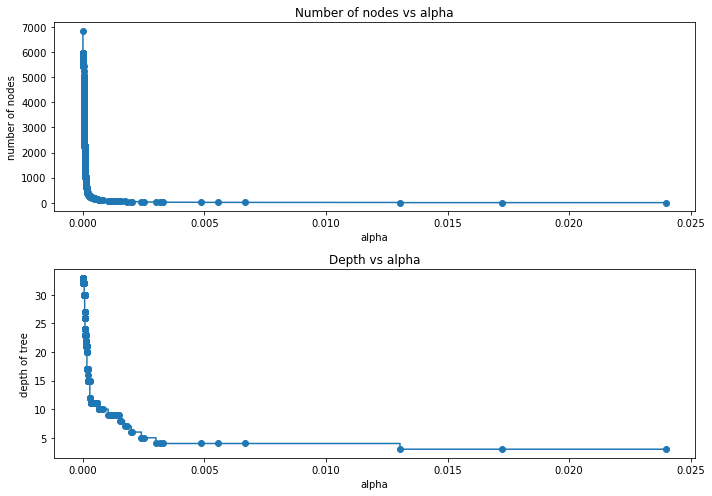

<IPython.core.display.Javascript object>

In [106]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Observations:  

The alpha does not change that much until you get down to around 500 node and around 10 on the depth of the tree.  Alpha then begins to flatten out. 

#### F1 Score vs alpha for training and testing sets

In [107]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(Y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(Y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

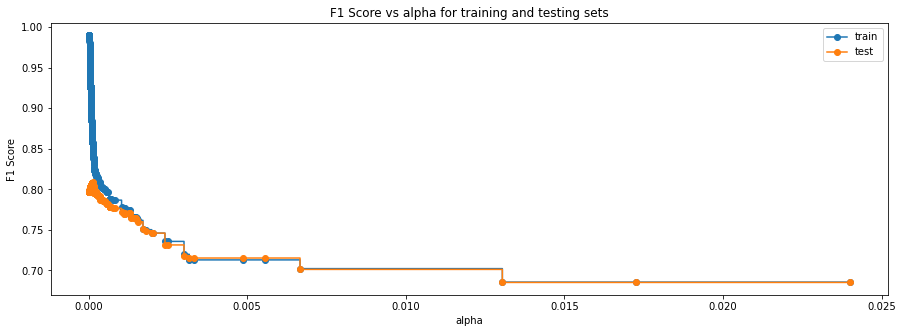

<IPython.core.display.Javascript object>

In [108]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001235740794181424, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

#### Performance on Training Set

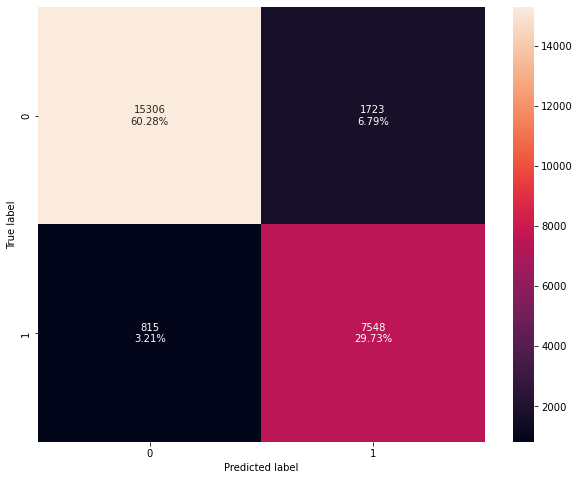

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(best_model, X_train, Y_train)

In [111]:
decision_tree_perf_train = model_performance_classification_sklearn(
    best_model, X_train, Y_train
)
decision_tree_perf_train.T

0
Accuracy   0.900047
Recall     0.902547
Precision  0.814152
F1         0.856073

<IPython.core.display.Javascript object>

In [112]:
models_train_comp_df["Cost Complexity"] = pd.concat(
    [decision_tree_perf_train.T], axis=1,
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Baseline Performance  Pre-Prune  Cost Complexity
Accuracy               0.994211   0.831010         0.900047
Recall                 0.986608   0.786201         0.902547
Precision              0.995776   0.724278         0.814152
F1                     0.991171   0.753971         0.856073

<IPython.core.display.Javascript object>

#### Observations:  

The metrics are better for Cost Complexity as opposed to Pre-Purne and are better than the Baseline

#### Performance on Test Set

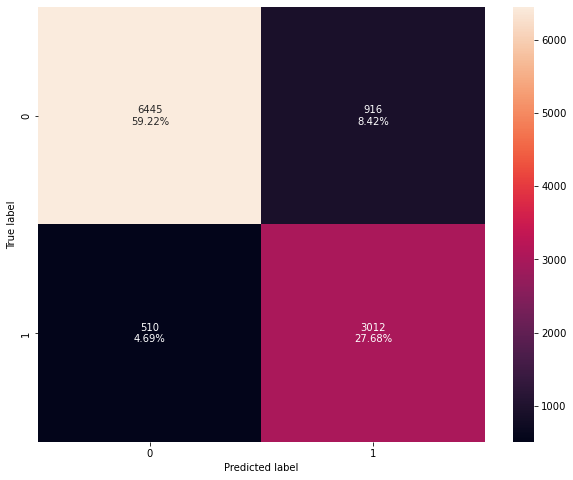

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(best_model, X_test, Y_test)

In [114]:
decision_tree_perf_test = model_performance_classification_sklearn(
    best_model, X_test, Y_test
)
decision_tree_perf_test.T

0
Accuracy   0.868970
Recall     0.855196
Precision  0.766802
F1         0.808591

<IPython.core.display.Javascript object>

In [115]:
models_test_comp_df["Cost Complexity"] = pd.concat([decision_tree_perf_test.T], axis=1,)

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


Baseline Performance  Pre-Prune  Cost Complexity
Accuracy               0.874299   0.834972         0.868970
Recall                 0.814026   0.783362         0.855196
Precision              0.800838   0.727584         0.766802
F1                     0.807378   0.754444         0.808591

<IPython.core.display.Javascript object>

#### Observations:  

The metrics are better for Cost Complexity as opposed to Pre-Purne and are better than the Baseline

#### Visualize Decision Tree

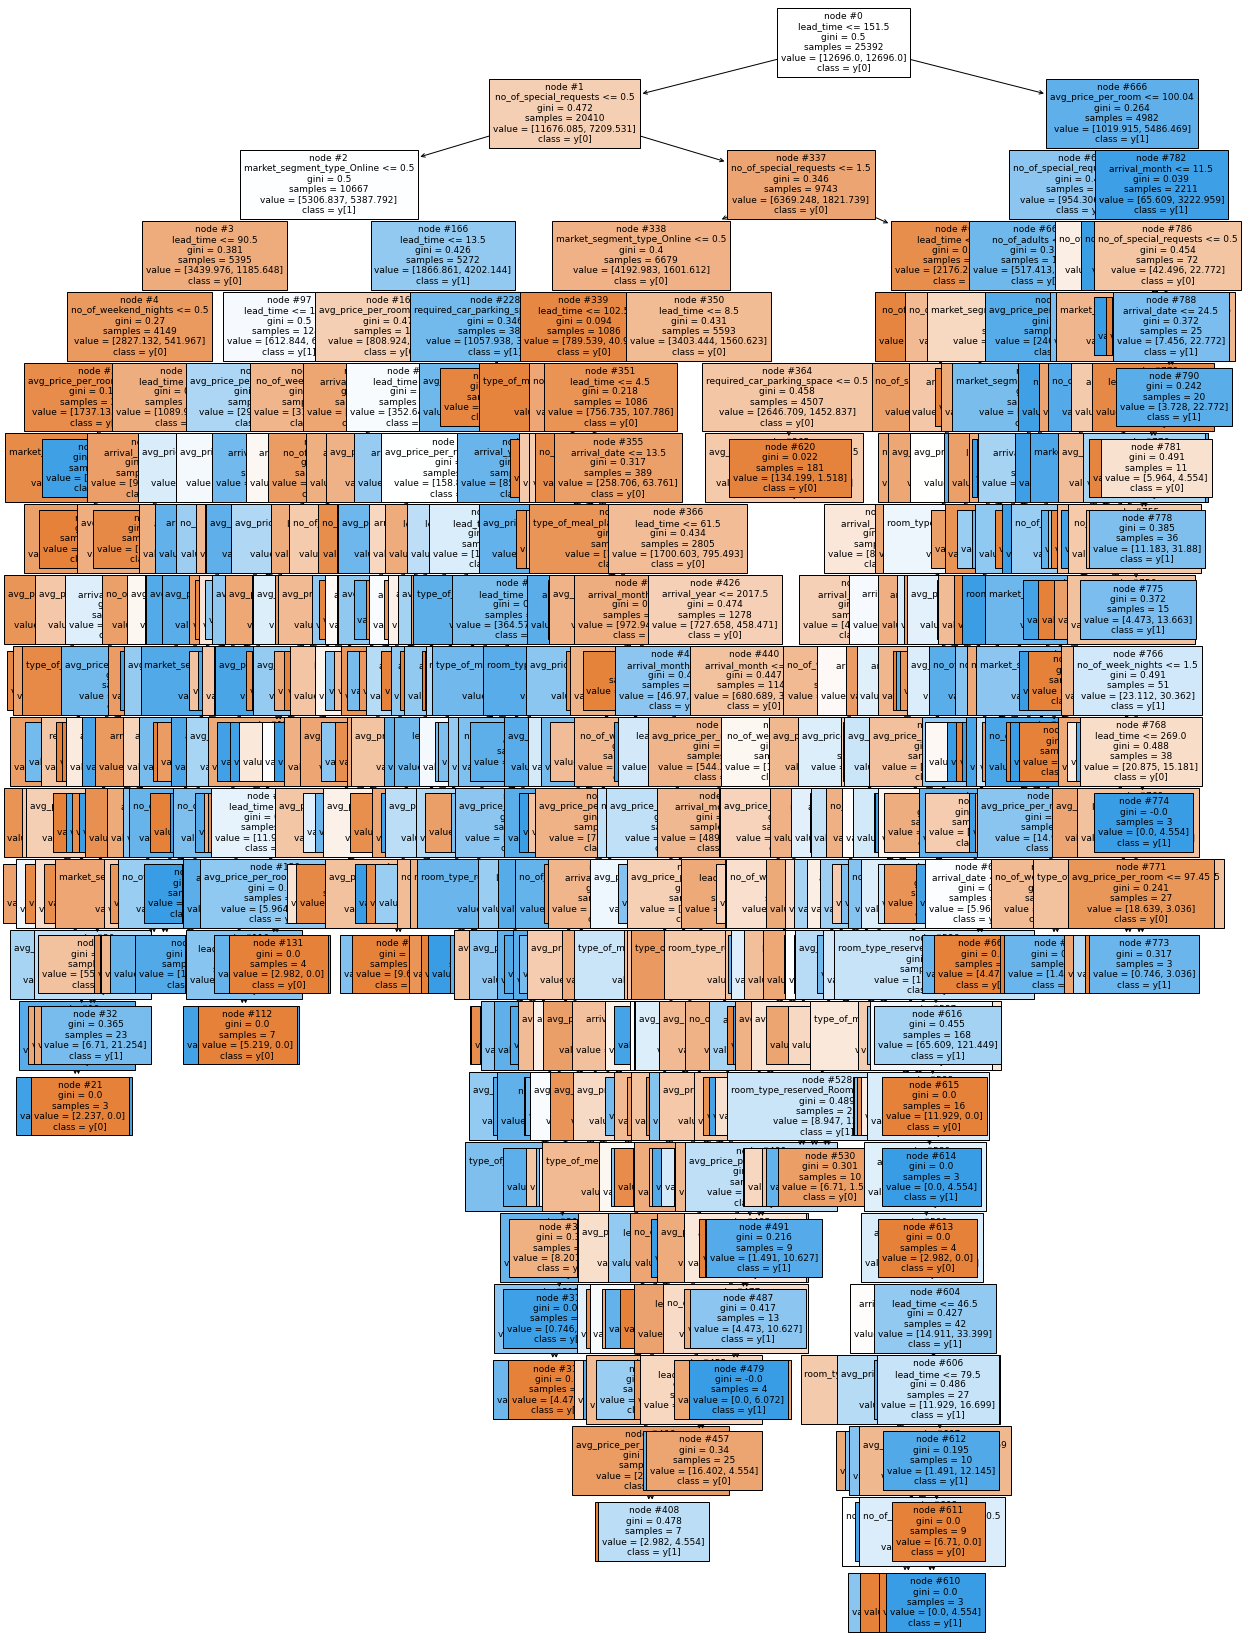

Wall time: 26.4 s


<IPython.core.display.Javascript object>

In [116]:
%%time

feature_names = list(X.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Observations:

* Still a pretty complex tree 
* 26.4 seconds to render 
* Better, but there could be even better trees 

In [117]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.393829
market_segment_type_Online            0.133446
avg_price_per_room                    0.123290
no_of_special_requests                0.120836
arrival_month                         0.059044
arrival_date                          0.034488
no_of_week_nights                     0.029621
no_of_weekend_nights                  0.025892
no_of_adults                          0.025488
arrival_year                          0.018936
market_segment_type_Offline           0.012553
required_car_parking_space            0.010072
type_of_meal_plan_Not Selected        0.005468
room_type_reserved_Room_Type 4        0.001903
market_segment_type_Corporate         0.001588
room_type_reserved_Room_Type 2        0.000810
type_of_meal_plan_Meal Plan 2         0.000661
room_type_reserved_Room_Type 6        0.000596
room_type_reserved_Room_Type 5        0.000577
no_of_children                        0.000559
repeated_gues

<IPython.core.display.Javascript object>

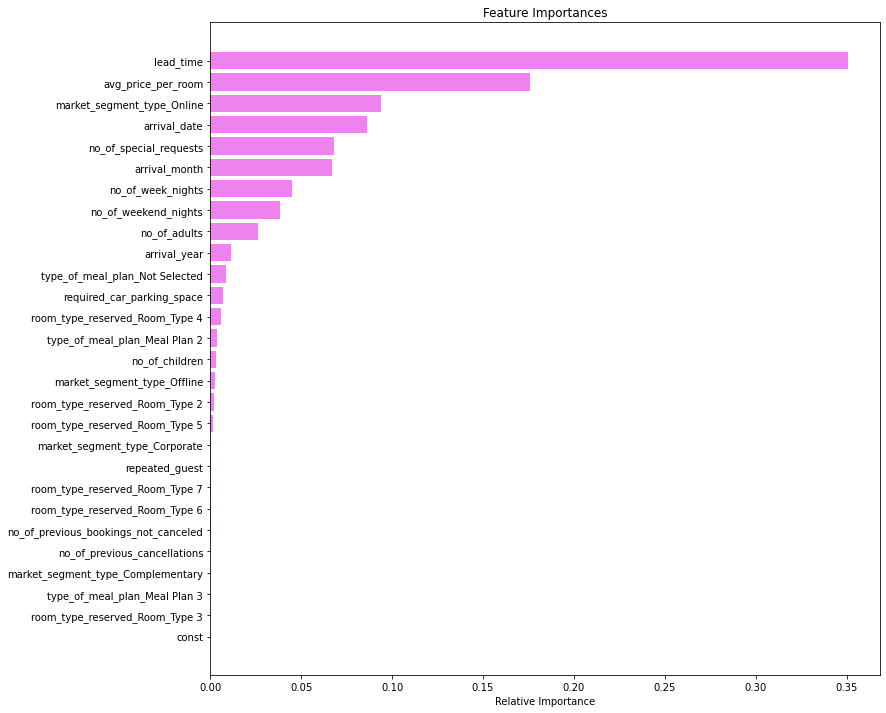

Wall time: 201 ms


<IPython.core.display.Javascript object>

In [118]:
%%time

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:

* More columns with relative importance 

## Model Performance Comparison and Conclusions

In [119]:
print("Train and test performance comparison:")

print("Train performance:")
# print(models_train_comp_df)
display(models_train_comp_df)

print("\n\nTest performance:")
# print(models_test_comp_df)
display(models_test_comp_df)

Train and test performance comparison:
Train performance:


Baseline Performance  Pre-Prune  Cost Complexity
Accuracy               0.994211   0.831010         0.900047
Recall                 0.986608   0.786201         0.902547
Precision              0.995776   0.724278         0.814152
F1                     0.991171   0.753971         0.856073



Test performance:


Baseline Performance  Pre-Prune  Cost Complexity
Accuracy               0.874299   0.834972         0.868970
Recall                 0.814026   0.783362         0.855196
Precision              0.800838   0.727584         0.766802
F1                     0.807378   0.754444         0.808591

<IPython.core.display.Javascript object>

## Actionable Insights 

* Guests are more likely not to cancel if they make the reservation directly with the hotel
    * Source: see URLs in Background Information section 
* There are 46.08% of reservations with a lead time longer than 65 days
    * Reservations with lead times longer than 60 days are 65% more likely to be canceled
* There are 18.98% of reservations with a lead time of 10 days or less
    * These reservations have the lowest chance of cancellations
* The current cancellation rate is 32.76% which is lower than the average of 40% 
    * The booking.com cancellation rate is: 60% 
    * Source: see URLs in Background Information section 
* Online booking cancellation rate is 71.31% of the total cancellations 
    * This is the largest source of cancellations
    * Most likely, guests are booking at many hotels and selecting the one with the best rate 
* Offline booking cancellations rate is 26.53% 
    * This is high and is an area for improvement
* Average price per room was high in 2018 
* There was a low number of repeat customers 
    * Could be value based guests looking for best price 
* Ask guests for special requests during reservation process as this will increase the chances of the guest showing up 


## Recommendations

* Make it easy for guests to make a reservation directly with the hotel
    * Make reservation over the phone 
    * Make reservation on the hotel's web site  
    * Relatively speaking, this has a low cancellation rate and can help to build loyality 
* Make it easy for guests to make another reservation directly with the hotel
    * Add a "Book Again" button the reservation or stay confirmation web page 
    * I have used this button many times 
* Try to get more last minute or "quick getaway" guests as they have low cancellation rates
    * The cruise industry frequently does this to fill cabins that otherwise would go empty 
* Have special rates and discounts that are only available by contacting the hotel or booking with the hotel's web site
* Expland the market share for Aviation as it is a constant source of travelers 
* Track if the stay type: business, personal, corporate, conference, etc. 
* Send an email or some type of communication to the guest before arrival as this dramatically cuts down on the number of cancellations 
    * Source: see URLs in Background Information section 
* Expand the number of corporate bookings as this market section has a low cancellation rate 
    * This would have worked in 2018 and 2019 
    * This may not be so true in 2022 due to the pandemic 
* Start a frequent stay program to entice guests to return 
* Offer the ability to upgrade to a better room at a discount especially if the room will be empty anyway 
    * I have taken these offers more than once 
    * This will free up a lower end room that can be resold  
* If the guest has any special requests, add them to this guest profile for future use
<br>
* If using Logistic Regression, use a threshold value of 0.42
* If using a Decision Tree model, use the cost complexity model 
    

## Future Recommendations

* Add the number of rooms reserved to the data to collect which reservation took more than one room 
* Perform a data analysis on stay type to determine if there is an under served market 
* Track source of online booking -- which online travel agency was used 
    * Can provide insight into cancellation rate by source of reservation 
    * Consider delisting from the sites with the highest cancellation rates 
* Perform a marketing study to compare the hotel's rate with others in the area 
